<a href="https://colab.research.google.com/github/Raan010101/ML2324T1_Project/blob/main/Final_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries



In [1]:

import gspread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from google.auth import default



#**ANISHA**

####Load the dataset

In [2]:
file_path = '2017 to 2021 - permintaan_data(new).csv'
data = pd.read_csv(file_path)


####Display Top 10 Schemes with the Most Transactions in Mukim Setapak:

In [3]:
# Filter data for properties in Mukim Setapak
setapak_data = data[data['DISTRICT'] == 'Mukim Setapak']

# Group the Setapak data by 'SCHEME' and count the number of transactions in each group
scheme_counts = setapak_data['SCHEME'].value_counts().reset_index()
scheme_counts.columns = ['SCHEME', 'TransactionCount']

# Sort the groups by transaction count in descending order
sorted_schemes = scheme_counts.sort_values(by='TransactionCount', ascending=False)

# Display the top 3 schemes with the most transactions in Mukim Setapak
top_10_schemes = sorted_schemes.head(10)
print("Top 3 Schemes with the Most Transactions in Mukim Setapak:")
print(top_10_schemes)


Top 3 Schemes with the Most Transactions in Mukim Setapak:
                          SCHEME  TransactionCount
0     RESIDENSI PLATINUM TERATAI               251
1  BANDAR BARU WANGSA MAJU SEK 2               182
2                     TMN MELATI               177
3          VILLA WANGSAMAS CONDO               171
4              TMN TERATAI MEWAH               164
5  BANDAR BARU WANGSA MAJU SEK 1               161
6    PANGSAPURI BANDARAYA GOMBAK               125
7                 TMN DANAU KOTA               108
8                   IRAMA WANGSA               101
9                   SENTUL MURNI                98


####Create seperate CSV with Top 10 Schemes in Setapak

In [4]:
top_10_schemes = ['RESIDENSI PLATINUM TERATAI', 'BANDAR BARU WANGSA MAJU SEK 2', 'TMN MELATI', 'VILLA WANGSAMAS CONDO', 'TMN TERATAI MEWAH', 'BANDAR BARU WANGSA MAJU SEK 1', 'PANGSAPURI BANDARAYA GOMBAK', 'TMN DANAU KOTA', 'IRAMA WANGSA','SENTUL MURNI']
# Filter the data to include only rows with schemes in the top 10
filtered_data = data[data['SCHEME'].isin(top_10_schemes)]

# Save the filtered data to a separate CSV file
filtered_data.to_csv('top_10_schemes_data.csv', index=False)

print("Data for the top 10 schemes in Setapak has been saved to 'top_10_schemes_data.csv'.")


Data for the top 10 schemes in Setapak has been saved to 'top_10_schemes_data.csv'.


####Display new CSV head(5)

In [5]:
df = pd.read_csv('/content/top_10_schemes_data.csv')

# Select rows where a specific column contains "Mukim Setapak"
selected_rows = df.loc[df['DISTRICT'] == 'Mukim Setapak']

# Save changes to the original file
selected_rows.to_csv('2017 to 2021 - permintaan_data(new).csv', index=False)  #Overwrites original file

# Set display options to show all rows, columns, and prevent truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -50)  # Set to a large negative value to prevent truncation

# Print the selected rows
selected_rows.head(5)



<ipython-input-5-2b9d92aea6da>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -50)  # Set to a large negative value to prevent truncation


,STATE,DISTRICT,DATE,SQUAREFOOT,TYPE,PROPERTY,PROPERTY DESCRIPTION,UNIT,STREET,SCHEME,AVAILABILITY,PRICE,YEAR,distance_to_hospital,distance_to_LRT
0,Kuala Lumpur,Mukim Setapak,2/12/2020,149.000,Condominium/Apartment,Residential,Condominium/Apartment,32,"C-9-10,JALAN 3/27E",IRAMA WANGSA,1,999000,2020,9.81,3.61
1,Kuala Lumpur,Mukim Setapak,14/1/2021,149.000,Condominium/Apartment,Residential,Condominium/Apartment,32,"C-9-8,JALAN 3/27E",IRAMA WANGSA,1,999000,2021,5.57,5.34
2,Kuala Lumpur,Mukim Setapak,23/2/2021,139.000,Condominium/Apartment,Residential,Condominium/Apartment,32,"C-16-7,JALAN 3/27E",IRAMA WANGSA,1,987000,2021,6.98,0.92
3,Kuala Lumpur,Mukim Setapak,19/2/2020,344.009,Terraced House,Residential,2 - 2 1/2 Storey Terraced,2,"UNIT NO.26,JALAN 4/5A",TMN MELATI,1,980000,2020,3.52,5.00
4,Kuala Lumpur,Mukim Setapak,9/5/2017,65.030,Low-Cost Flat,Residential,Low-Cost Flat,20,"D-18-17,JLN TMN. IBU KOTA",TMN DANAU KOTA,1,98000,2017,1.74,9.91


####Code Shape

In [6]:
selected_rows.shape

(1538, 15)

####Collumns

In [7]:
selected_rows.columns

Index(['STATE', 'DISTRICT', 'DATE', 'SQUAREFOOT', 'TYPE', 'PROPERTY',
       'PROPERTY DESCRIPTION', 'UNIT', 'STREET', 'SCHEME', 'AVAILABILITY',
       'PRICE', 'YEAR', 'distance_to_hospital', 'distance_to_LRT'],
      dtype='object')

####Rows

In [8]:
selected_rows.count()

STATE                   1538
DISTRICT                1538
DATE                    1538
SQUAREFOOT              1538
TYPE                    1538
PROPERTY                1538
PROPERTY DESCRIPTION    1538
UNIT                    1538
STREET                  1538
SCHEME                  1538
AVAILABILITY            1538
PRICE                   1538
YEAR                    1538
distance_to_hospital    1538
distance_to_LRT         1538
dtype: int64

In [9]:
selected_rows.dtypes



STATE                   object 
DISTRICT                object 
DATE                    object 
SQUAREFOOT              float64
TYPE                    object 
PROPERTY                object 
PROPERTY DESCRIPTION    object 
UNIT                    int64  
STREET                  object 
SCHEME                  object 
AVAILABILITY            int64  
PRICE                   int64  
YEAR                    int64  
distance_to_hospital    float64
distance_to_LRT         float64
dtype: object

####Heat map

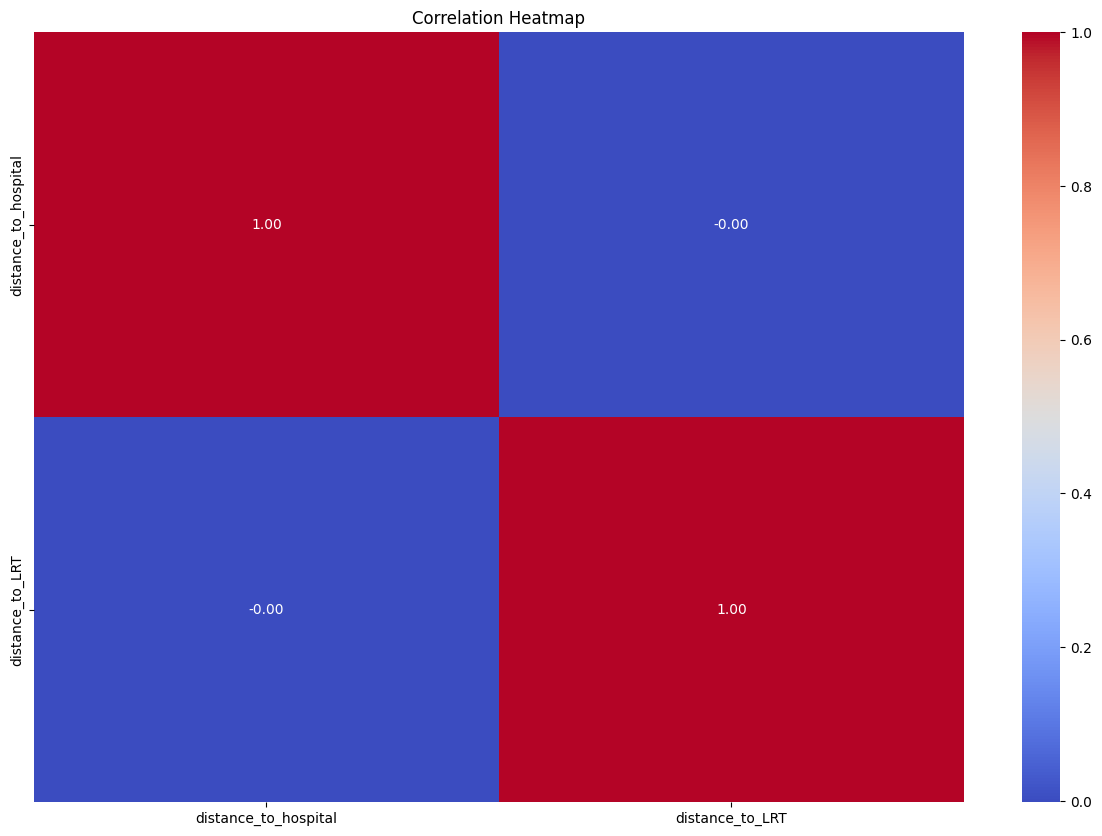

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


####Dropping unwanted columns

In [11]:
selected_rows.dtypes

STATE                   object 
DISTRICT                object 
DATE                    object 
SQUAREFOOT              float64
TYPE                    object 
PROPERTY                object 
PROPERTY DESCRIPTION    object 
UNIT                    int64  
STREET                  object 
SCHEME                  object 
AVAILABILITY            int64  
PRICE                   int64  
YEAR                    int64  
distance_to_hospital    float64
distance_to_LRT         float64
dtype: object

In [12]:
unique_values_column1 = selected_rows['STATE'].unique()
unique_values_column2 = selected_rows['TYPE'].unique()
unique_values_column3 = selected_rows['PROPERTY'].unique()
unique_values_column4 = selected_rows['PROPERTY DESCRIPTION'].unique()
unique_values_column5 = selected_rows['AVAILABILITY'].unique()
# Print unique values for each column
print("Unique values for STATE:", unique_values_column1)
print("Unique values for TYPE:", unique_values_column2)
print("Unique values for PROPERTY:", unique_values_column3)
print("Unique values for PROPERTY DESCRIPTION:", unique_values_column4)
print("Unique values for AVAILABILITY:", unique_values_column5)

Unique values for STATE: ['Kuala Lumpur']
Unique values for TYPE: ['Condominium/Apartment' 'Terraced House' 'Low-Cost Flat' 'Flat']
Unique values for PROPERTY: ['Residential']
Unique values for PROPERTY DESCRIPTION: ['Condominium/Apartment' '2 - 2 1/2 Storey Terraced' 'Low-Cost Flat'
 'Flat']
Unique values for AVAILABILITY: [1]


In [13]:
columns_of_interest = ['STATE', 'TYPE', 'PROPERTY', 'PROPERTY DESCRIPTION', 'AVAILABILITY']

for column in columns_of_interest:
    counts = selected_rows[column].value_counts()
    print(f"Count of values for {column} column:")
    print(counts)
    print()  # Print an empty line for better readability


Count of values for STATE column:
Kuala Lumpur    1538
Name: STATE, dtype: int64

Count of values for TYPE column:
Low-Cost Flat            583
Condominium/Apartment    563
Flat                     377
Terraced House           15 
Name: TYPE, dtype: int64

Count of values for PROPERTY column:
Residential    1538
Name: PROPERTY, dtype: int64

Count of values for PROPERTY DESCRIPTION column:
Low-Cost Flat                583
Condominium/Apartment        563
Flat                         377
2 - 2 1/2 Storey Terraced    15 
Name: PROPERTY DESCRIPTION, dtype: int64

Count of values for AVAILABILITY column:
1    1538
Name: AVAILABILITY, dtype: int64



In [14]:
# Columns to drop
columns_to_drop = ['PROPERTY','DISTRICT','STREET','STATE','PROPERTY DESCRIPTION', 'AVAILABILITY','DATE']

# Check if the columns to drop exist in the DataFrame
existing_columns = set(selected_rows.columns)
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the specified columns
df_cleaned = selected_rows.drop(columns=columns_to_drop)

# Print the first few rows of the cleaned DataFrame
display(df_cleaned.head())


,SQUAREFOOT,TYPE,UNIT,SCHEME,PRICE,YEAR,distance_to_hospital,distance_to_LRT
0,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2020,9.81,3.61
1,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2021,5.57,5.34
2,139.000,Condominium/Apartment,32,IRAMA WANGSA,987000,2021,6.98,0.92
3,344.009,Terraced House,2,TMN MELATI,980000,2020,3.52,5.00
4,65.030,Low-Cost Flat,20,TMN DANAU KOTA,98000,2017,1.74,9.91


####Updated HeatMap

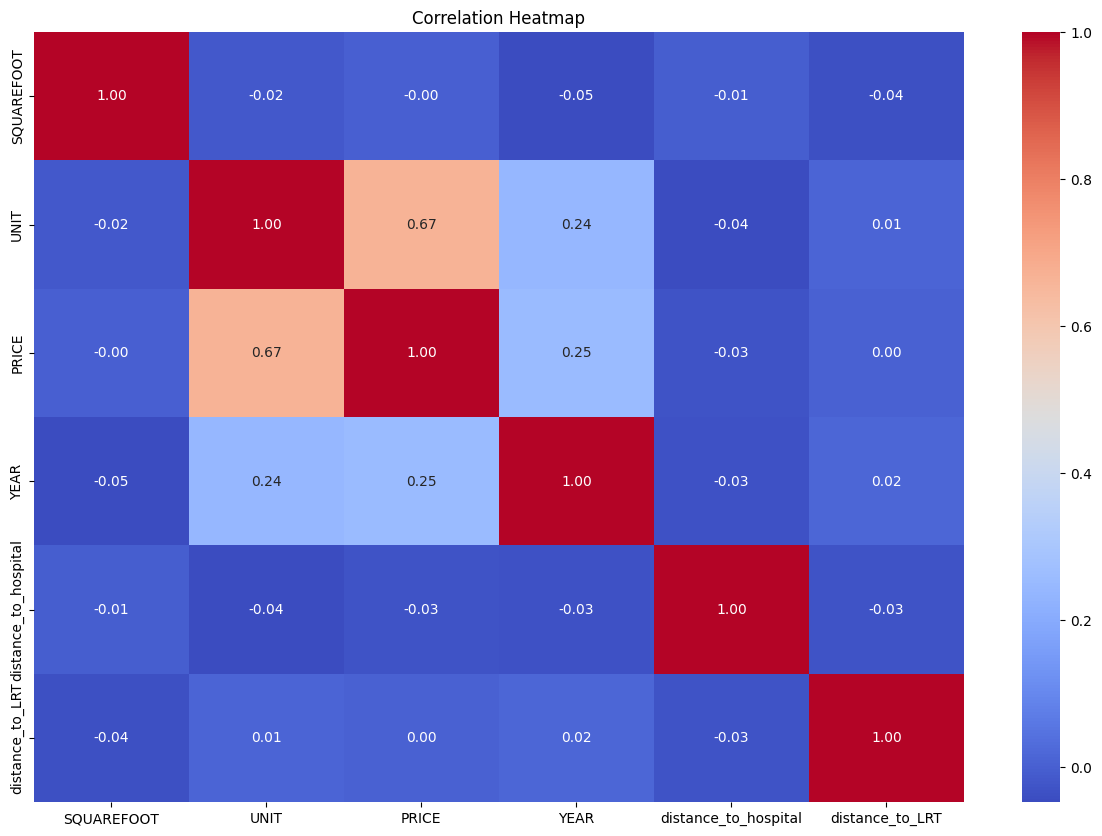

In [15]:
# Calculate the correlation matrix
corr_matrix =df_cleaned.select_dtypes(include=['float64', 'int64']).corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

####Sorting the Price (Cheap, Average, Expensive)

#####Define bin edges and labels

In [16]:
bins = [0, 250000, 600000, float('inf')]
labels = ['cheap', 'normal', 'expensive']



#####Categorize 'PRICE' based on the defined bins and labels

In [17]:
df_cleaned['Price_Category'] = pd.cut(df_cleaned['PRICE'], bins=bins, labels=labels, right=False)



##### Display the 'PRICE' and 'Price_Category' columns to see the new labels

In [18]:
columns_of_interest = ['Price_Category']

for column in columns_of_interest:
    counts = df_cleaned[column].value_counts()
    print(f"Count of values for {column} column:")
    print(counts)
    print()  # Print an empty line for better readability


Count of values for Price_Category column:
cheap        862
normal       538
expensive    138
Name: Price_Category, dtype: int64



In [19]:
display(df_cleaned[['PRICE', 'Price_Category']].head(20))

,PRICE,Price_Category
0,999000,expensive
1,999000,expensive
2,987000,expensive
3,980000,expensive
4,98000,cheap
5,979000,expensive
6,974000,expensive
7,972000,expensive
8,966000,expensive
9,966000,expensive


####Price Category Graph

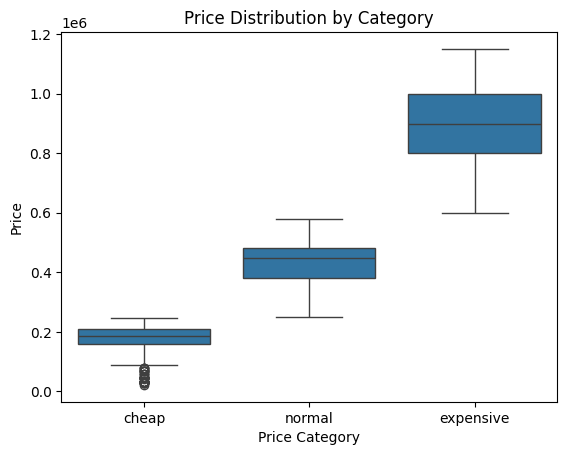

In [20]:
sns.boxplot(data=df_cleaned, x='Price_Category', y='PRICE')
plt.title('Price Distribution by Category')
plt.xlabel('Price Category')
plt.ylabel('Price')
plt.show()


####Checking/dropping for NaN Values

In [21]:
df_cleaned.dropna(inplace=True)

In [22]:
df_cleaned.count()

SQUAREFOOT              1538
TYPE                    1538
UNIT                    1538
SCHEME                  1538
PRICE                   1538
YEAR                    1538
distance_to_hospital    1538
distance_to_LRT         1538
Price_Category          1538
dtype: int64

####Calculate the Price per square foot

In [23]:
df_cleaned.loc[:, 'price_per_sqft'] = df_cleaned['PRICE'] / df_cleaned['SQUAREFOOT']

In [24]:
df_cleaned[["price_per_sqft"]] = df_cleaned[["price_per_sqft"]].astype("float")
df_cleaned['price_per_sqft'] = df_cleaned['price_per_sqft'].round(2)
df_cleaned['PRICE'] = df_cleaned['PRICE'].round(2)

In [25]:
df_cleaned.head(10)

,SQUAREFOOT,TYPE,UNIT,SCHEME,PRICE,YEAR,distance_to_hospital,distance_to_LRT,Price_Category,price_per_sqft
0,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2020,9.81,3.61,expensive,6704.70
1,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2021,5.57,5.34,expensive,6704.70
2,139.000,Condominium/Apartment,32,IRAMA WANGSA,987000,2021,6.98,0.92,expensive,7100.72
3,344.009,Terraced House,2,TMN MELATI,980000,2020,3.52,5.00,expensive,2848.76
4,65.030,Low-Cost Flat,20,TMN DANAU KOTA,98000,2017,1.74,9.91,cheap,1507.00
5,139.000,Condominium/Apartment,32,IRAMA WANGSA,979000,2020,7.11,9.54,expensive,7043.17
6,139.000,Condominium/Apartment,32,IRAMA WANGSA,974000,2019,4.36,8.86,expensive,7007.19
7,139.000,Condominium/Apartment,32,IRAMA WANGSA,972000,2019,4.05,7.71,expensive,6992.81
8,139.000,Condominium/Apartment,32,IRAMA WANGSA,966000,2020,8.82,3.58,expensive,6949.64
9,139.000,Condominium/Apartment,32,IRAMA WANGSA,966000,2019,4.74,4.93,expensive,6949.64


####Sorting the data

In [26]:
columns_to_check = ["SQUAREFOOT", "PRICE", "UNIT", "price_per_sqft", 'YEAR']
df_cleaned = df_cleaned.loc[~(df_cleaned[columns_to_check] == 0).all(axis=1)]
display(df_cleaned.head())


,SQUAREFOOT,TYPE,UNIT,SCHEME,PRICE,YEAR,distance_to_hospital,distance_to_LRT,Price_Category,price_per_sqft
0,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2020,9.81,3.61,expensive,6704.70
1,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2021,5.57,5.34,expensive,6704.70
2,139.000,Condominium/Apartment,32,IRAMA WANGSA,987000,2021,6.98,0.92,expensive,7100.72
3,344.009,Terraced House,2,TMN MELATI,980000,2020,3.52,5.00,expensive,2848.76
4,65.030,Low-Cost Flat,20,TMN DANAU KOTA,98000,2017,1.74,9.91,cheap,1507.00


####Trend of Price per Square Foot

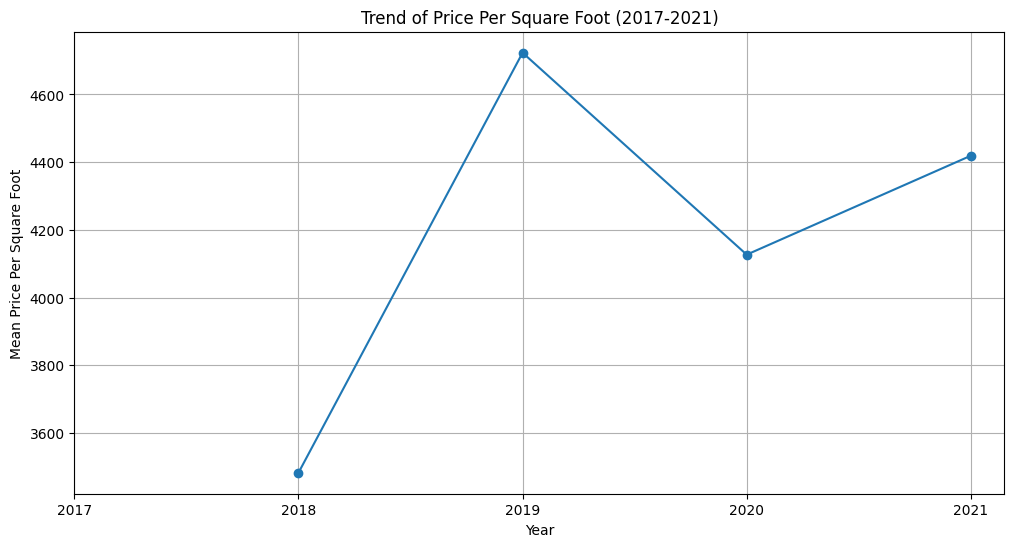

In [27]:
# Filter data for the years between 2017 and 2021
data_years = df_cleaned[(df_cleaned['YEAR'] >= 2017) & (df_cleaned['YEAR'] <= 2021)]
mean_price_per_year = data_years.groupby('YEAR')['price_per_sqft'].mean()
plt.figure(figsize=(12, 6))
mean_price_per_year.plot(marker='o')
plt.xlabel("Year")
plt.ylabel("Mean Price Per Square Foot")
plt.title("Trend of Price Per Square Foot (2017-2021)")
plt.xticks(mean_price_per_year.index)
plt.grid()

plt.show()


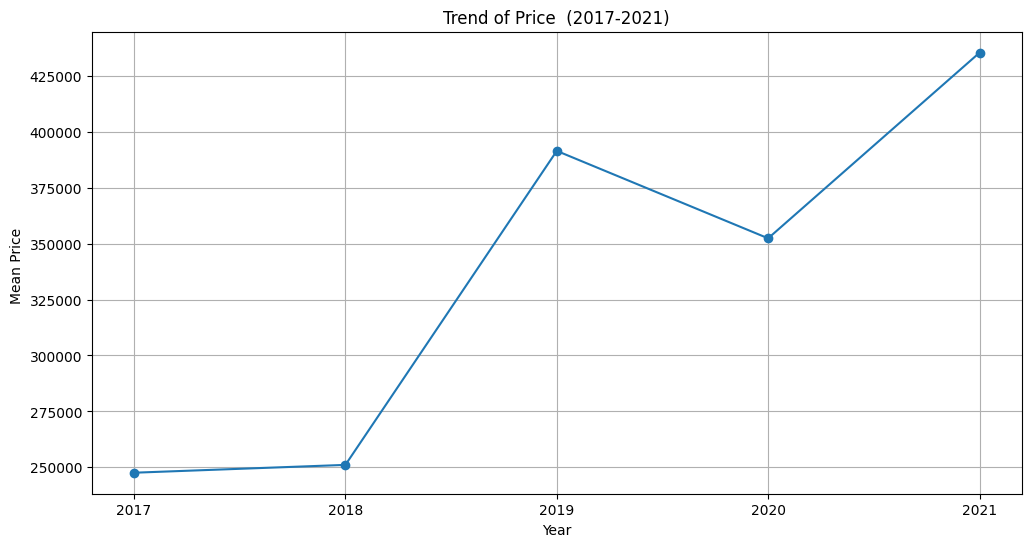

In [28]:
# Filter data for the years between 2017 and 2021
data_years = df_cleaned[(df_cleaned['YEAR'] >= 2017) & (df_cleaned['YEAR'] <= 2021)]

# Group data by year and calculate the mean price per square foot for each year
mean_price_per_year = data_years.groupby('YEAR')['PRICE'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
mean_price_per_year.plot(marker='o')
plt.xlabel("Year")
plt.ylabel("Mean Price ")
plt.title("Trend of Price  (2017-2021)")
plt.xticks(mean_price_per_year.index)
plt.grid()

plt.show()


#### Influence of Distance to Nearest Hospitals on Property Prices



In [29]:
# Group by 'DistanceToHospital' and calculate average 'PRICE'
avg_price_by_distance = df_cleaned.groupby('distance_to_hospital')['PRICE'].mean().reset_index()


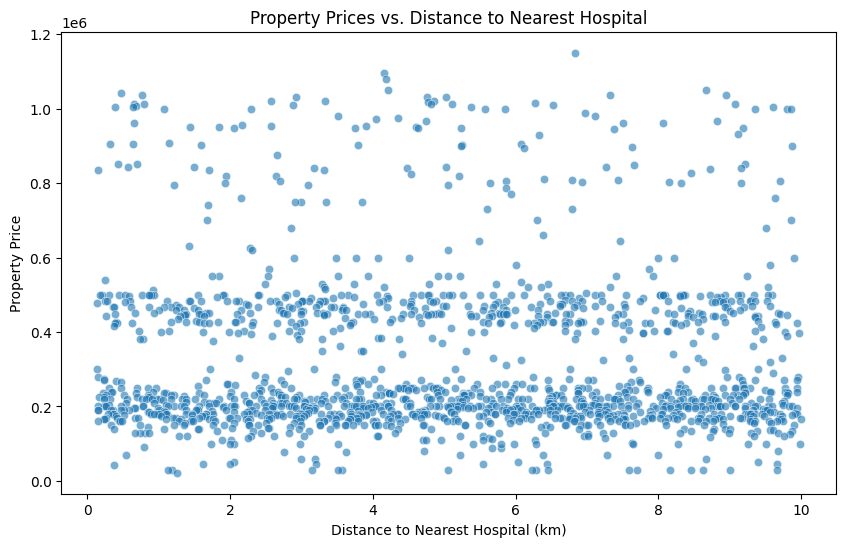

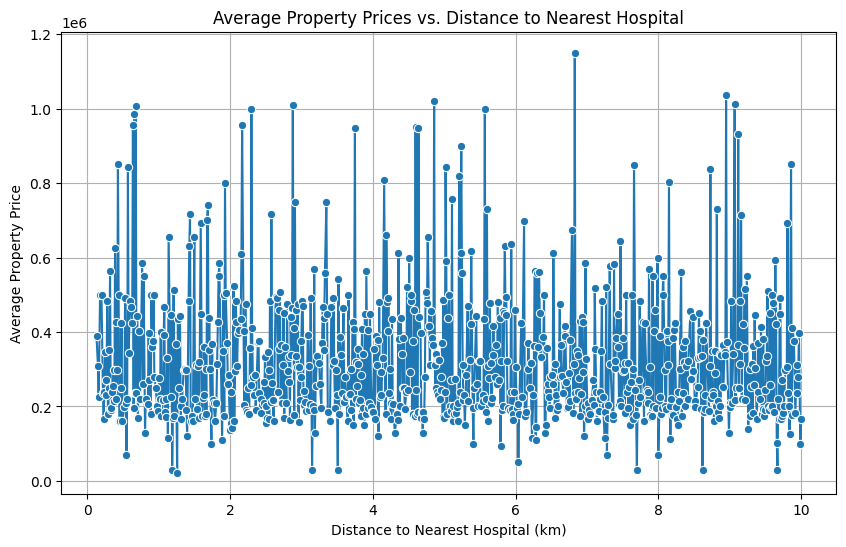

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_hospital', y='PRICE', data=df_cleaned, alpha=0.6)
plt.title('Property Prices vs. Distance to Nearest Hospital')
plt.xlabel('Distance to Nearest Hospital (km)')
plt.ylabel('Property Price')
plt.show()

# For a clearer trend, you can also use a line plot of the aggregated data
plt.figure(figsize=(10, 6))
sns.lineplot(x='distance_to_hospital', y='PRICE', data=avg_price_by_distance, marker='o')
plt.title('Average Property Prices vs. Distance to Nearest Hospital')
plt.xlabel('Distance to Nearest Hospital (km)')
plt.ylabel('Average Property Price')
plt.grid(True)
plt.show()


####Average Appreciation Rate by Distance to Nearest LRT Station

In [31]:
# Group by 'DistanceToLRT' and calculate average 'PRICE'
avg_price_by_distance_lrt = df_cleaned.groupby('distance_to_LRT')['PRICE'].mean().reset_index()


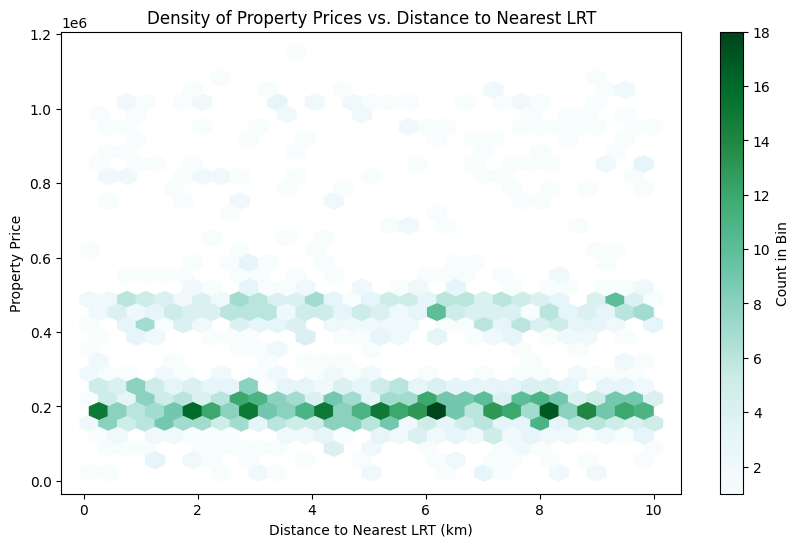

In [32]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_cleaned['distance_to_LRT'], df_cleaned['PRICE'], gridsize=30, cmap='BuGn', mincnt=1)
plt.colorbar(label='Count in Bin')
plt.title('Density of Property Prices vs. Distance to Nearest LRT')
plt.xlabel('Distance to Nearest LRT (km)')
plt.ylabel('Property Price')
plt.show()


In [33]:
df_cleaned.dtypes

SQUAREFOOT              float64 
TYPE                    object  
UNIT                    int64   
SCHEME                  object  
PRICE                   int64   
YEAR                    int64   
distance_to_hospital    float64 
distance_to_LRT         float64 
Price_Category          category
price_per_sqft          float64 
dtype: object

####Calculate mean, median, and mode of PRICE

In [34]:

mean_price = df_cleaned['PRICE'].mean()
median_price = df_cleaned['PRICE'].median()
mode_price = df_cleaned['PRICE'].mode()[0]  # mode() returns a Series, [0] gets the first mode

print(f"Mean PRICE: {mean_price}")
print(f"Median PRICE: {median_price}")
print(f"Mode PRICE: {mode_price}")


Mean PRICE: 324977.0513654096
Median PRICE: 227500.0
Mode PRICE: 200000


#### Histogram of Price Per Square Foot

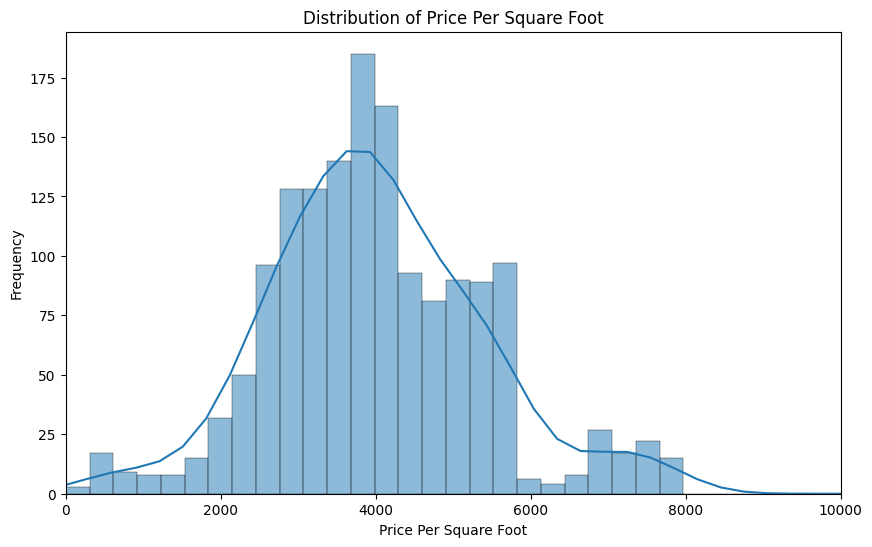

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price_per_sqft'], kde=True)
plt.title('Distribution of Price Per Square Foot')
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')

# Adjusting x-axis scale
plt.xlim(0, 10000)  # Set max_limit to the maximum value you want to display on the x-axis

plt.show()



#### Boxplot of Price Per Square Foot

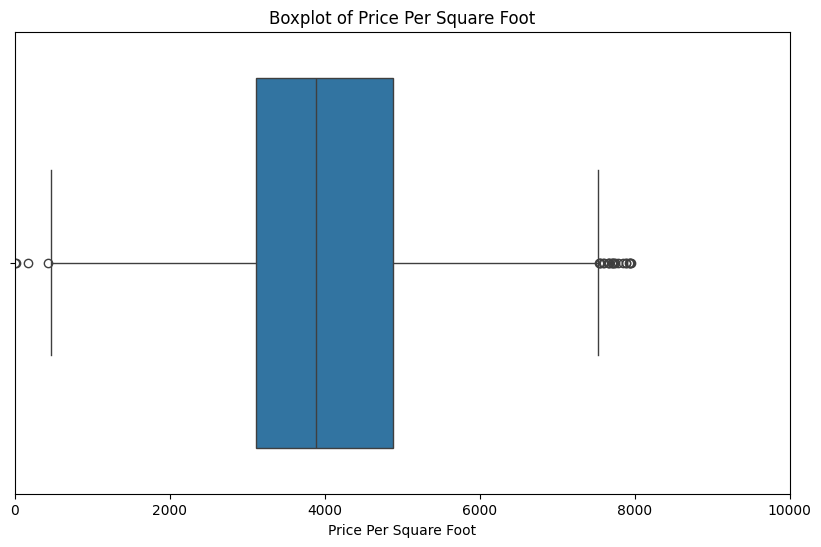

In [36]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['price_per_sqft'])
plt.title('Boxplot of Price Per Square Foot')
plt.xlabel('Price Per Square Foot')

plt.xlim(0, 10000)  # Set max_limit_boxplot to your desired maximum value for the x-axis

plt.show()



#**SUTHENT**

####Initial vs. Final Prices by Scheme

In [37]:
# Group the data by scheme
scheme_groups = df_cleaned.groupby('SCHEME')

# Calculate the initial and final prices for each scheme
initial_prices = scheme_groups['PRICE'].first()
final_prices = scheme_groups['PRICE'].last()

# Create a DataFrame to store the results
price_changes = pd.DataFrame({'Initial_Price': initial_prices, 'Final_Price': final_prices})

# Reset the index to have the scheme names as a column
price_changes = price_changes.reset_index()

# Print the DataFrame
print(price_changes)


                          SCHEME  Initial_Price  Final_Price
0  BANDAR BARU WANGSA MAJU SEK 1  80000          100000     
1  BANDAR BARU WANGSA MAJU SEK 2  77000          135000     
2  IRAMA WANGSA                   999000         1000000    
3  PANGSAPURI BANDARAYA GOMBAK    80000          100000     
4  RESIDENSI PLATINUM TERATAI     500000         362349     
5  SENTUL MURNI                   90000          100000     
6  TMN DANAU KOTA                 98000          100000     
7  TMN MELATI                     980000         100000     
8  TMN TERATAI MEWAH              88000          1000000    
9  VILLA WANGSAMAS CONDO          950000         1000000    


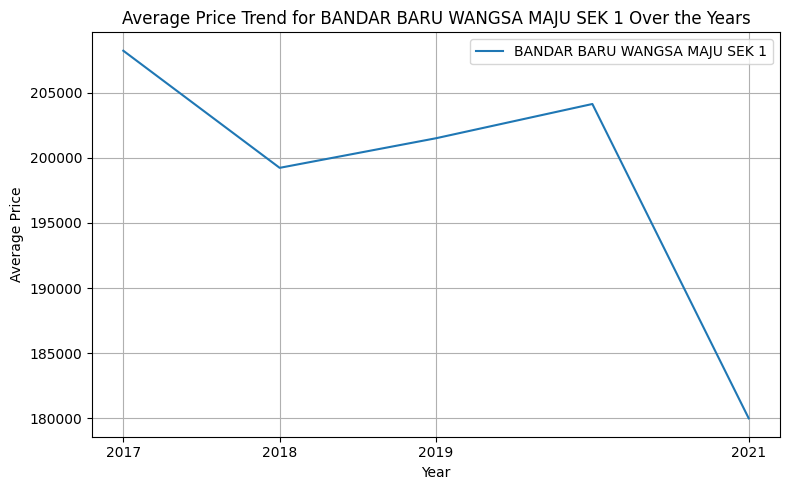

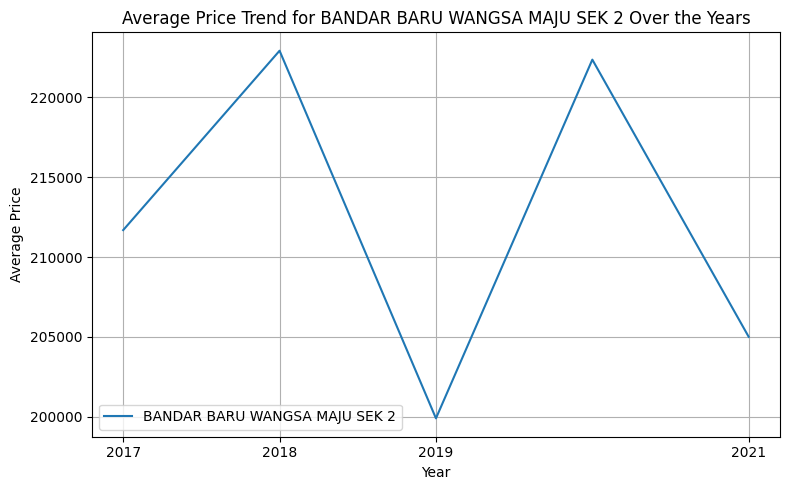

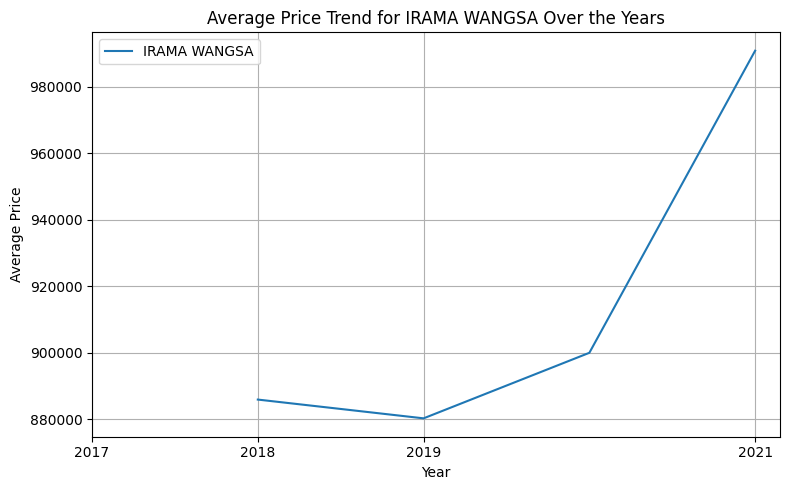

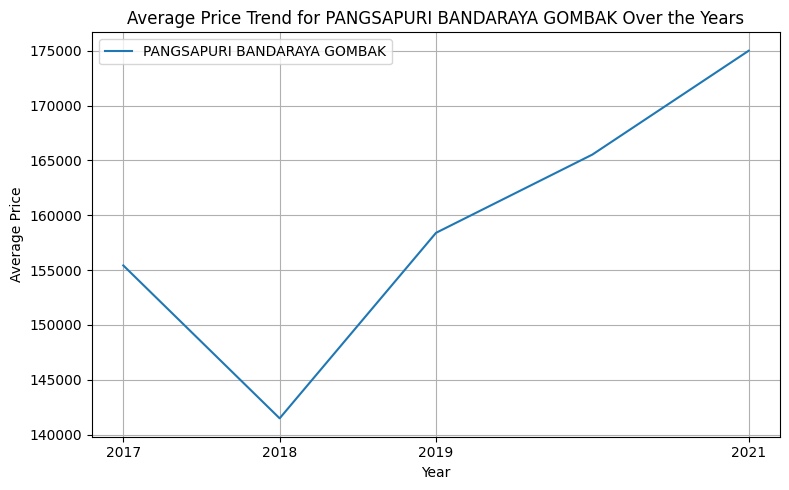

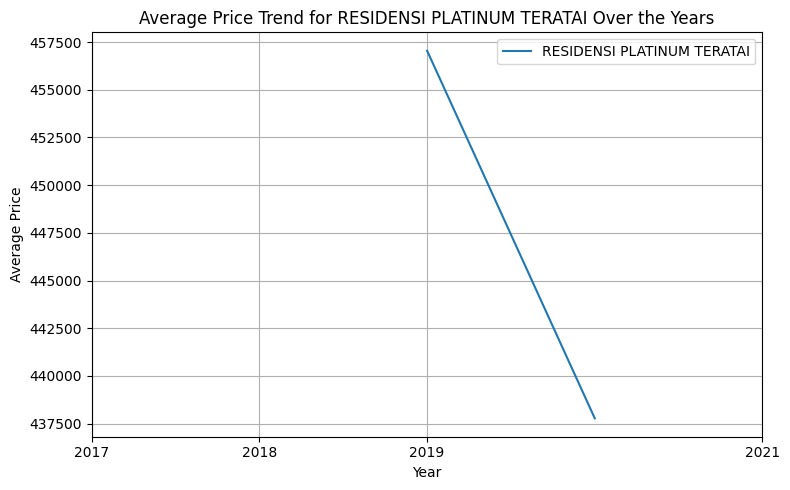

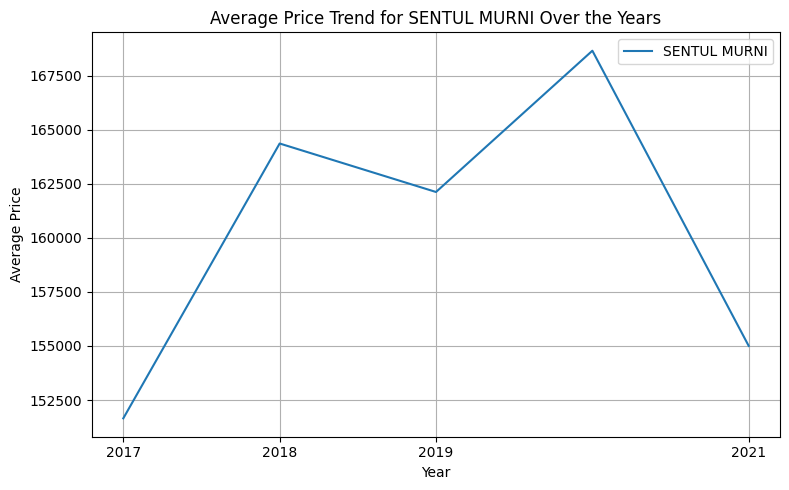

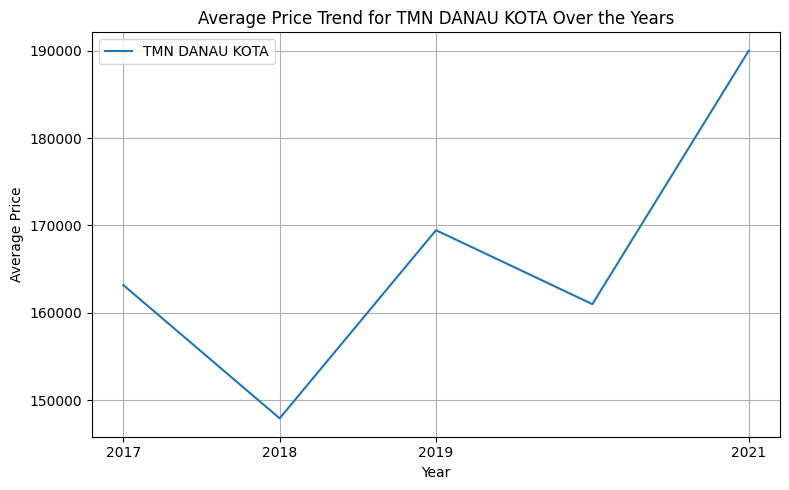

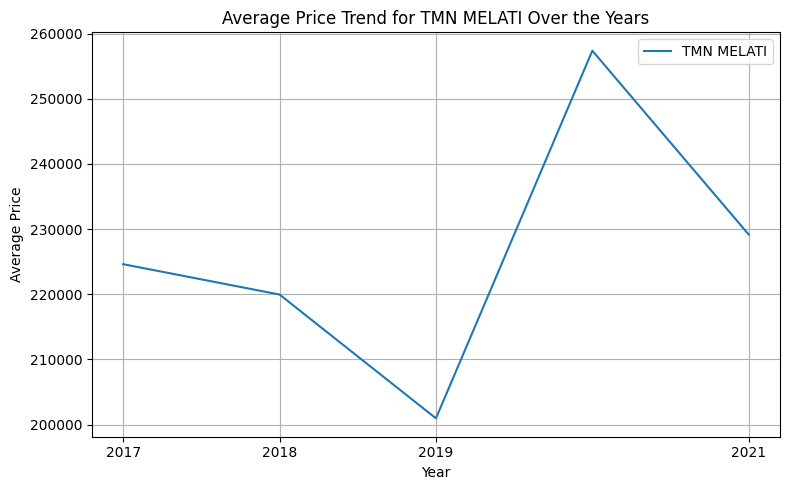

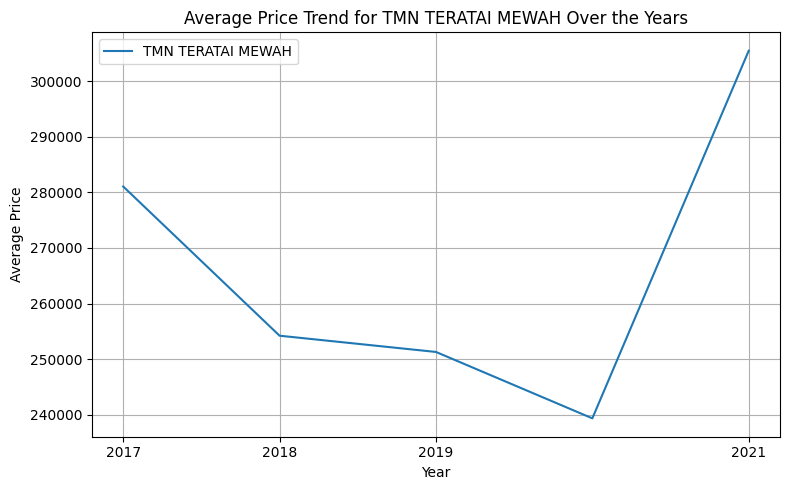

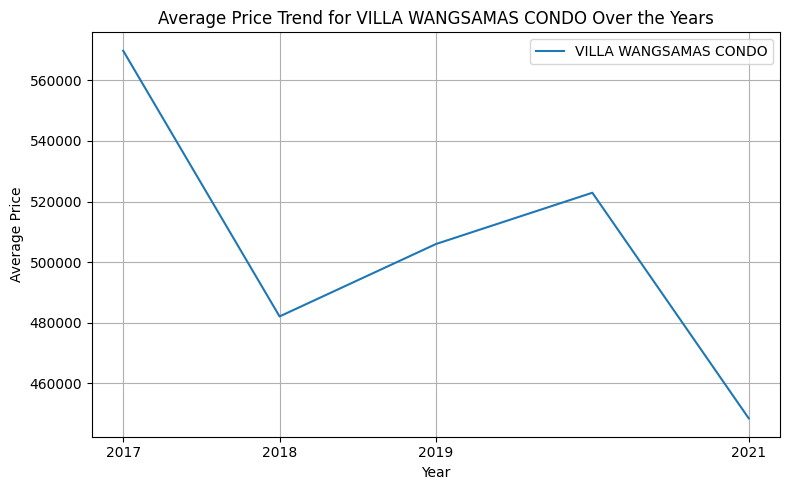

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define specific years to be displayed
specific_years = [2017, 2018, 2019, 2021]

# Group the data by scheme
scheme_groups = df_cleaned.groupby('SCHEME')

# Iterate over each scheme group
for scheme, group in scheme_groups:
    # Group the data by year and calculate the average price for each year
    average_prices = group.groupby('YEAR')['PRICE'].mean()

    # Create a new plot for each scheme
    plt.figure(figsize=(8, 5))
    plt.plot(average_prices.index, average_prices.values, label=scheme)

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.title(f'Average Price Trend for {scheme} Over the Years')
    plt.legend()

    # Set x-axis ticks to specific years
    plt.xticks(specific_years)

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [39]:
import pandas as pd

# Define empty dictionaries to store initial and final prices per property type per scheme
initial_prices = {}
final_prices = {}

# Iterate over each scheme group
for scheme, group in scheme_groups:
    # Group the data by property type and year
    property_type_groups = group.groupby(['TYPE', 'YEAR'])

    # Iterate over each property type group
    for (property_type, year), property_group in property_type_groups:
        # Calculate the average price for the current property type and year
        average_price = round(property_group['PRICE'].mean())  # Round off to a whole number

        # If the property type is not yet in the initial_prices dictionary, add it
        if (scheme, property_type) not in initial_prices:
            initial_prices[(scheme, property_type)] = average_price

        # Update the final price for the current property type and scheme
        final_prices[(scheme, property_type)] = average_price

# Create DataFrames for initial and final prices
initial_df = pd.DataFrame(initial_prices.items(), columns=['Scheme_Property', 'Initial_Price'])
final_df = pd.DataFrame(final_prices.items(), columns=['Scheme_Property', 'Final_Price'])

# Splitting Scheme_Property into separate columns for Scheme and Property Type
initial_df[['Scheme', 'Property_Type']] = pd.DataFrame(initial_df['Scheme_Property'].tolist(), index=initial_df.index)
final_df[['Scheme', 'Property_Type']] = pd.DataFrame(final_df['Scheme_Property'].tolist(), index=final_df.index)

# Drop the Scheme_Property column
initial_df.drop(columns=['Scheme_Property'], inplace=True)
final_df.drop(columns=['Scheme_Property'], inplace=True)

# Calculate appreciation rate
initial_df['Final_Price'] = final_df['Final_Price']
initial_df['Appreciation_Rate'] = ((final_df['Final_Price'] - initial_df['Initial_Price']) / initial_df['Initial_Price']) * 100

# Print DataFrames
print("Initial Prices per Property Type per Scheme:")
display(initial_df)

print("\nFinal Prices per Property Type per Scheme:")
display(final_df)


Initial Prices per Property Type per Scheme:


,Initial_Price,Scheme,Property_Type,Final_Price,Appreciation_Rate
0,199000,BANDAR BARU WANGSA MAJU SEK 1,Flat,221667,11.390452
1,208516,BANDAR BARU WANGSA MAJU SEK 1,Low-Cost Flat,180000,-13.675689
2,213333,BANDAR BARU WANGSA MAJU SEK 2,Flat,217500,1.953284
3,207457,BANDAR BARU WANGSA MAJU SEK 2,Low-Cost Flat,180000,-13.235032
4,885850,IRAMA WANGSA,Condominium/Apartment,990800,11.847378
5,141000,PANGSAPURI BANDARAYA GOMBAK,Flat,175000,24.113475
6,161086,PANGSAPURI BANDARAYA GOMBAK,Low-Cost Flat,184111,14.293607
7,457051,RESIDENSI PLATINUM TERATAI,Condominium/Apartment,437772,-4.218129
8,153500,SENTUL MURNI,Flat,153500,0.000000
9,151654,SENTUL MURNI,Low-Cost Flat,155000,2.206338



Final Prices per Property Type per Scheme:


,Final_Price,Scheme,Property_Type
0,221667,BANDAR BARU WANGSA MAJU SEK 1,Flat
1,180000,BANDAR BARU WANGSA MAJU SEK 1,Low-Cost Flat
2,217500,BANDAR BARU WANGSA MAJU SEK 2,Flat
3,180000,BANDAR BARU WANGSA MAJU SEK 2,Low-Cost Flat
4,990800,IRAMA WANGSA,Condominium/Apartment
5,175000,PANGSAPURI BANDARAYA GOMBAK,Flat
6,184111,PANGSAPURI BANDARAYA GOMBAK,Low-Cost Flat
7,437772,RESIDENSI PLATINUM TERATAI,Condominium/Apartment
8,153500,SENTUL MURNI,Flat
9,155000,SENTUL MURNI,Low-Cost Flat


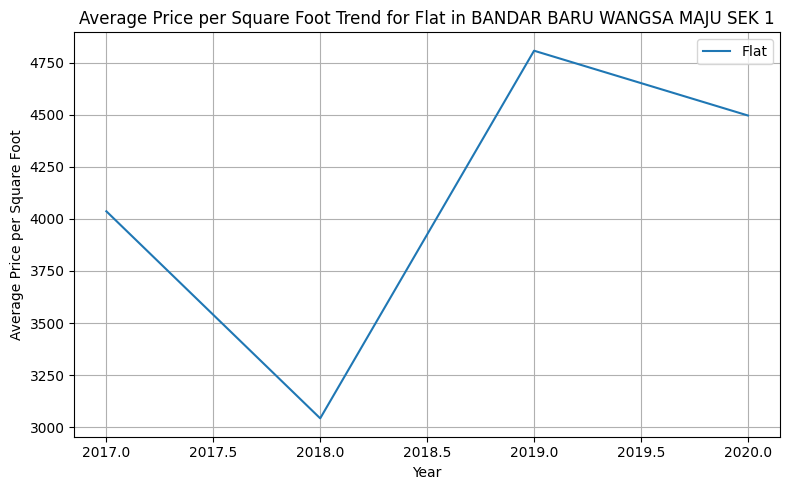

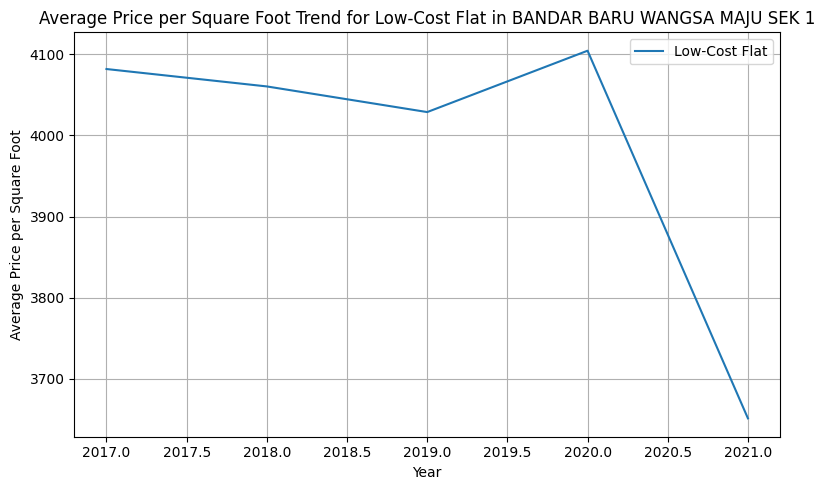

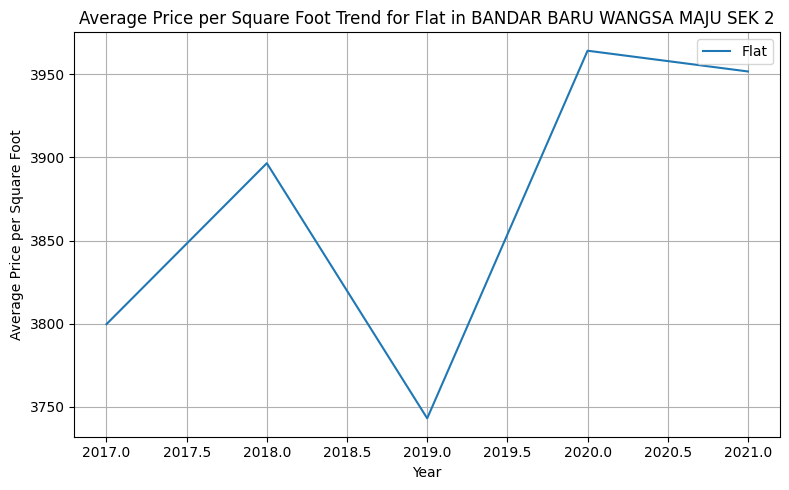

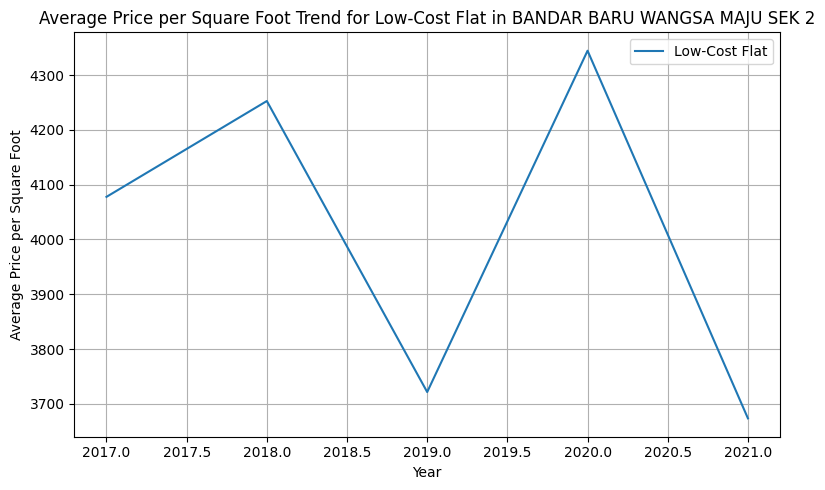

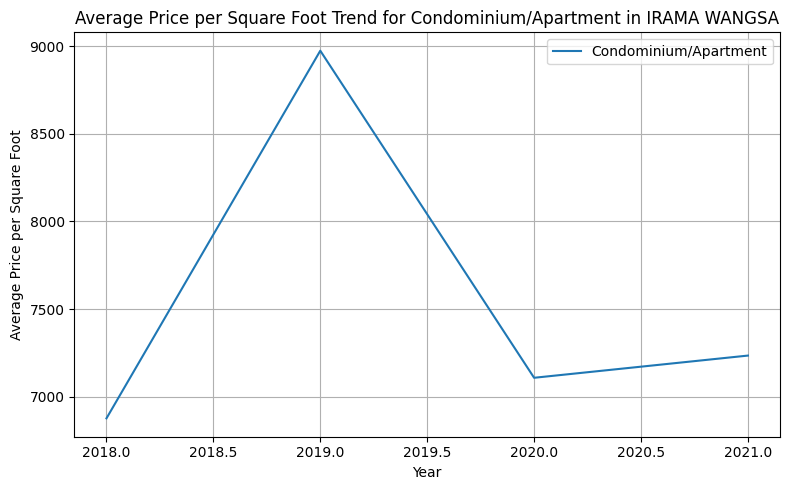

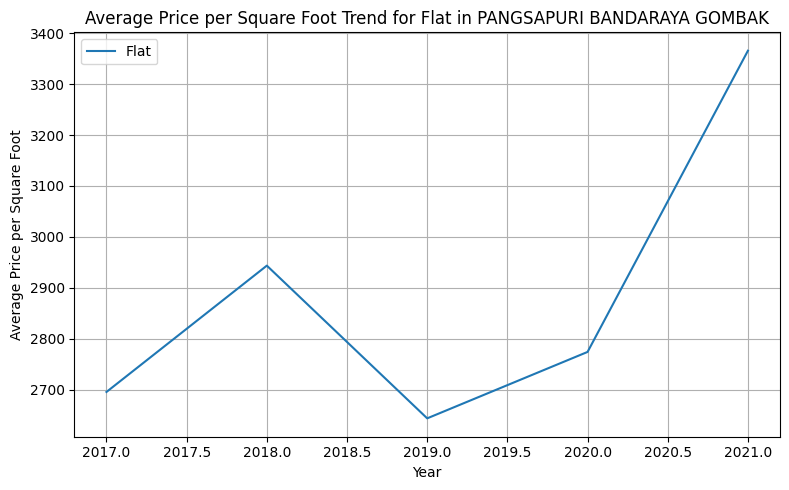

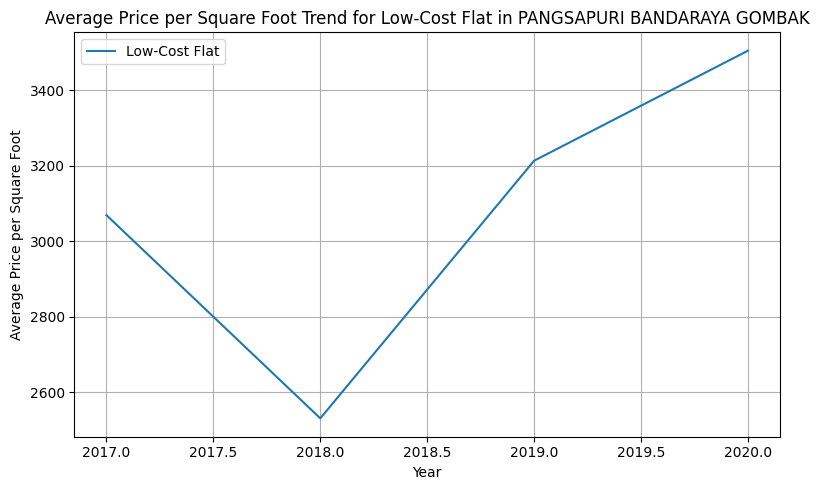

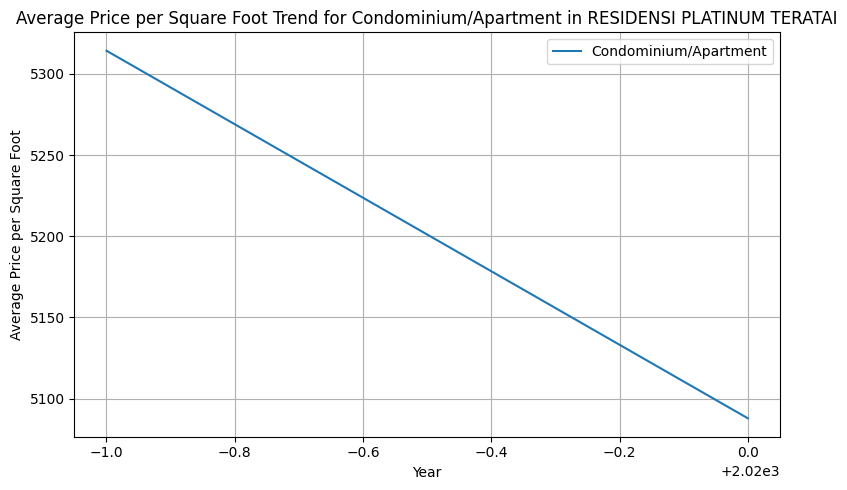

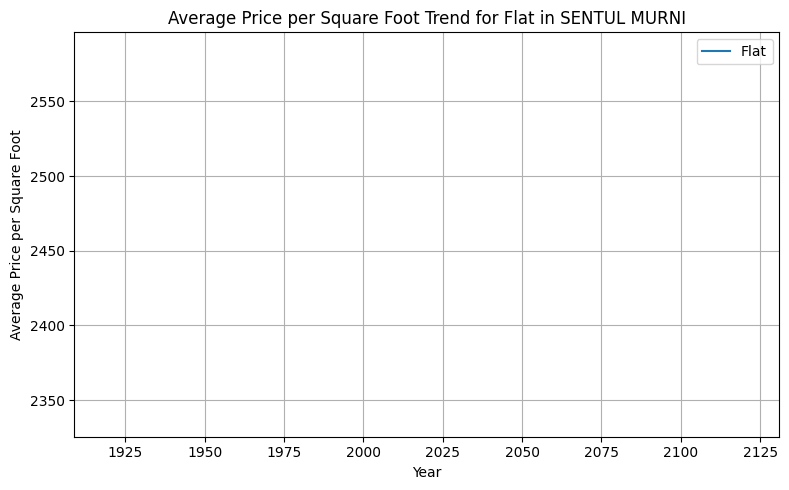

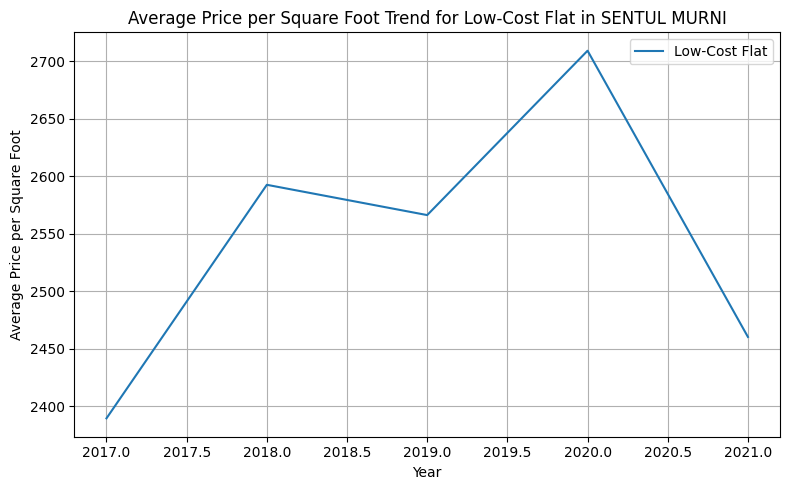

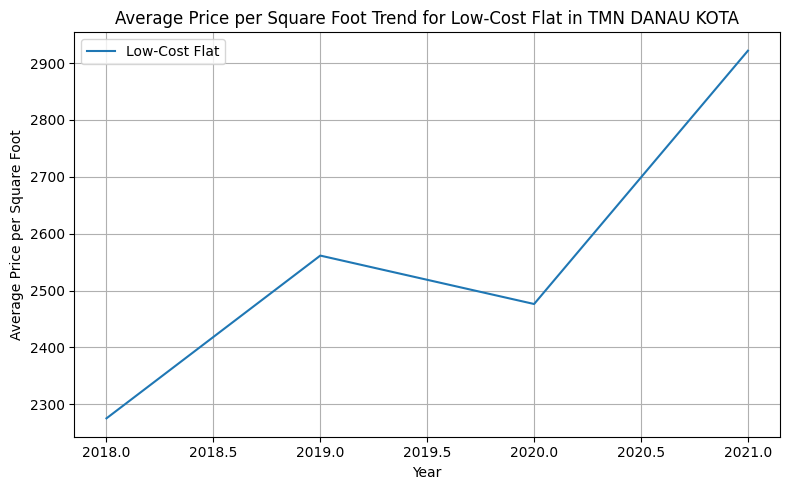

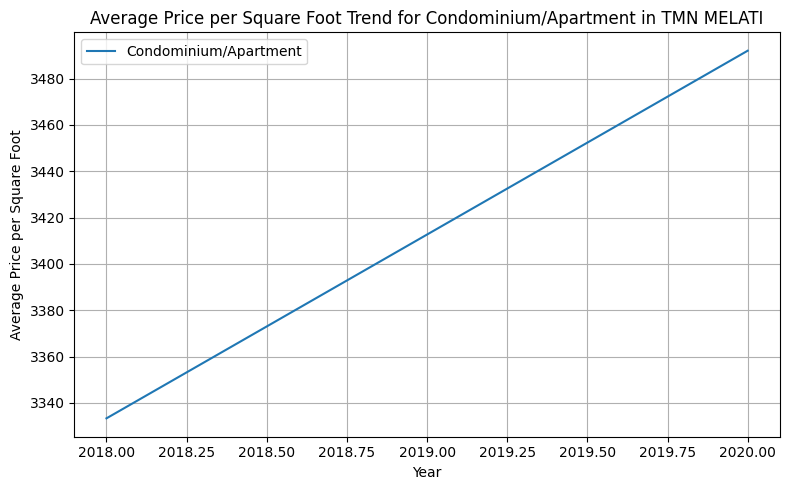

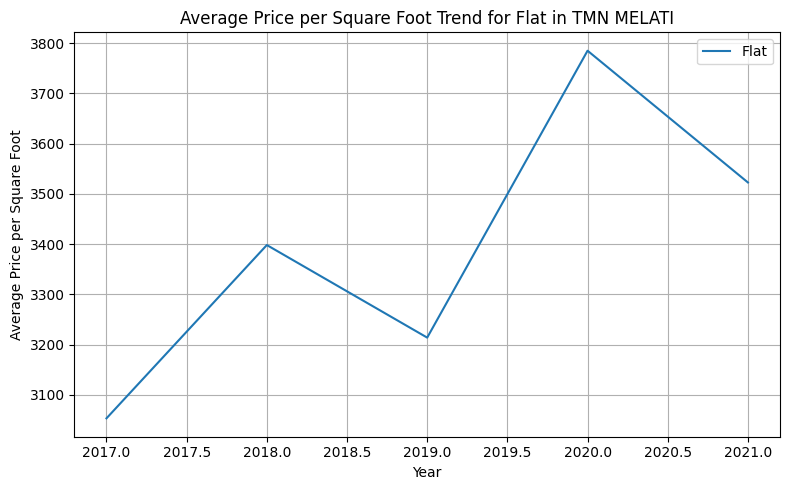

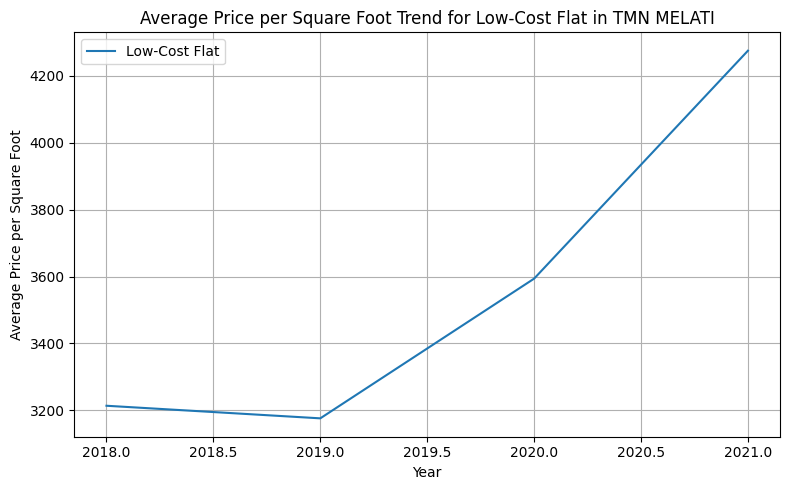

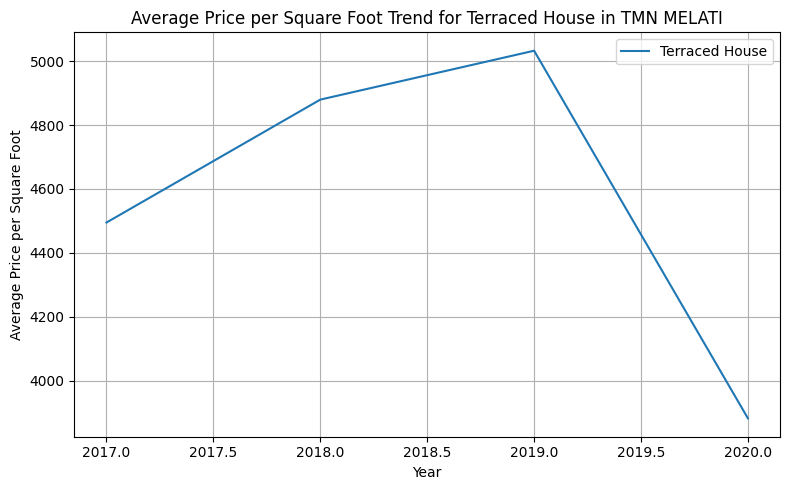

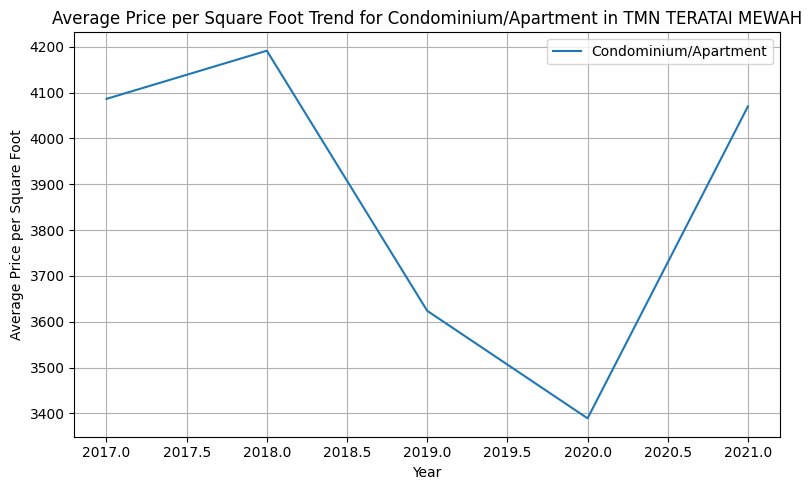

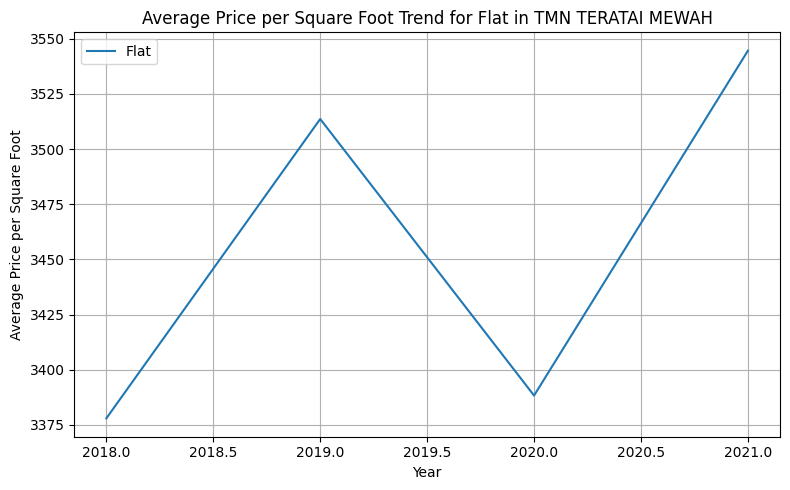

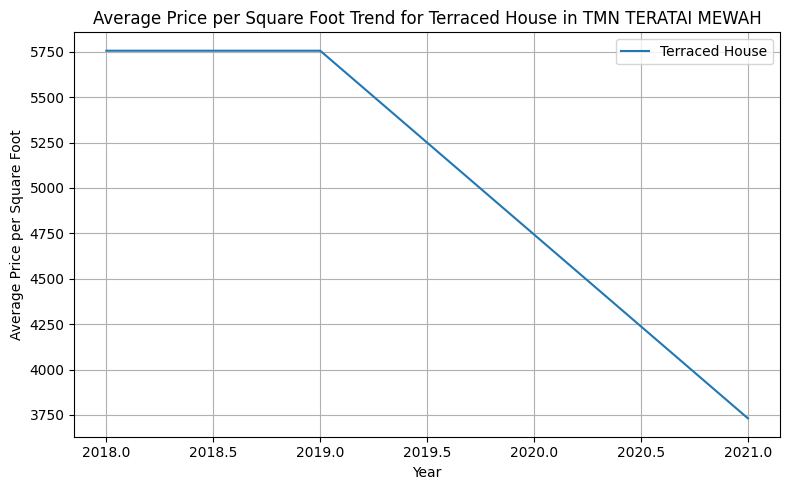

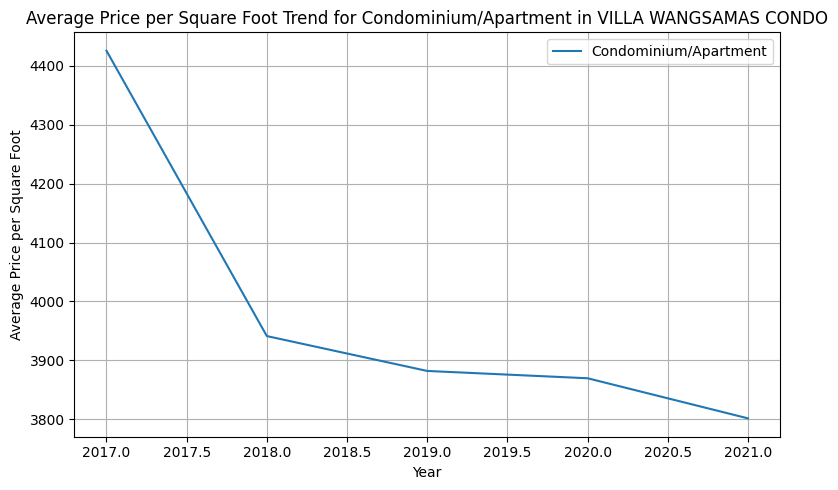

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by scheme and property type
grouped_data = df_cleaned.groupby(['SCHEME', 'TYPE', 'YEAR'])

# Calculate the average price per square foot for each property type within each scheme and year
average_price_per_sqft = grouped_data['price_per_sqft'].mean().reset_index()

# Iterate over each scheme and property type
for (scheme, property_type), group in average_price_per_sqft.groupby(['SCHEME', 'TYPE']):
    # Create a new plot for each scheme and property type
    plt.figure(figsize=(8, 5))
    plt.plot(group['YEAR'], group['price_per_sqft'], label=f'{property_type}')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Average Price per Square Foot')
    plt.title(f'Average Price per Square Foot Trend for {property_type} in {scheme}')
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [41]:
df_cleaned.head(5)

,SQUAREFOOT,TYPE,UNIT,SCHEME,PRICE,YEAR,distance_to_hospital,distance_to_LRT,Price_Category,price_per_sqft
0,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2020,9.81,3.61,expensive,6704.70
1,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2021,5.57,5.34,expensive,6704.70
2,139.000,Condominium/Apartment,32,IRAMA WANGSA,987000,2021,6.98,0.92,expensive,7100.72
3,344.009,Terraced House,2,TMN MELATI,980000,2020,3.52,5.00,expensive,2848.76
4,65.030,Low-Cost Flat,20,TMN DANAU KOTA,98000,2017,1.74,9.91,cheap,1507.00


In [42]:
# List of specific condo names
condo_names = [
    'RESIDENSI PLATINUM TERATAI', 'BANDAR BARU WANGSA MAJU SEK 2', 'TMN MELATI',
    'VILLA WANGSAMAS CONDO', 'TMN TERATAI MEWAH', 'BANDAR BARU WANGSA MAJU SEK 1',
    'PANGSAPURI BANDARAYA GOMBAK', 'TMN DANAU KOTA', 'IRAMA WANGSA', 'SENTUL MURNI'
]

# Filter the dataset for these condos
filtered_data = data[data['SCHEME'].isin(condo_names)]


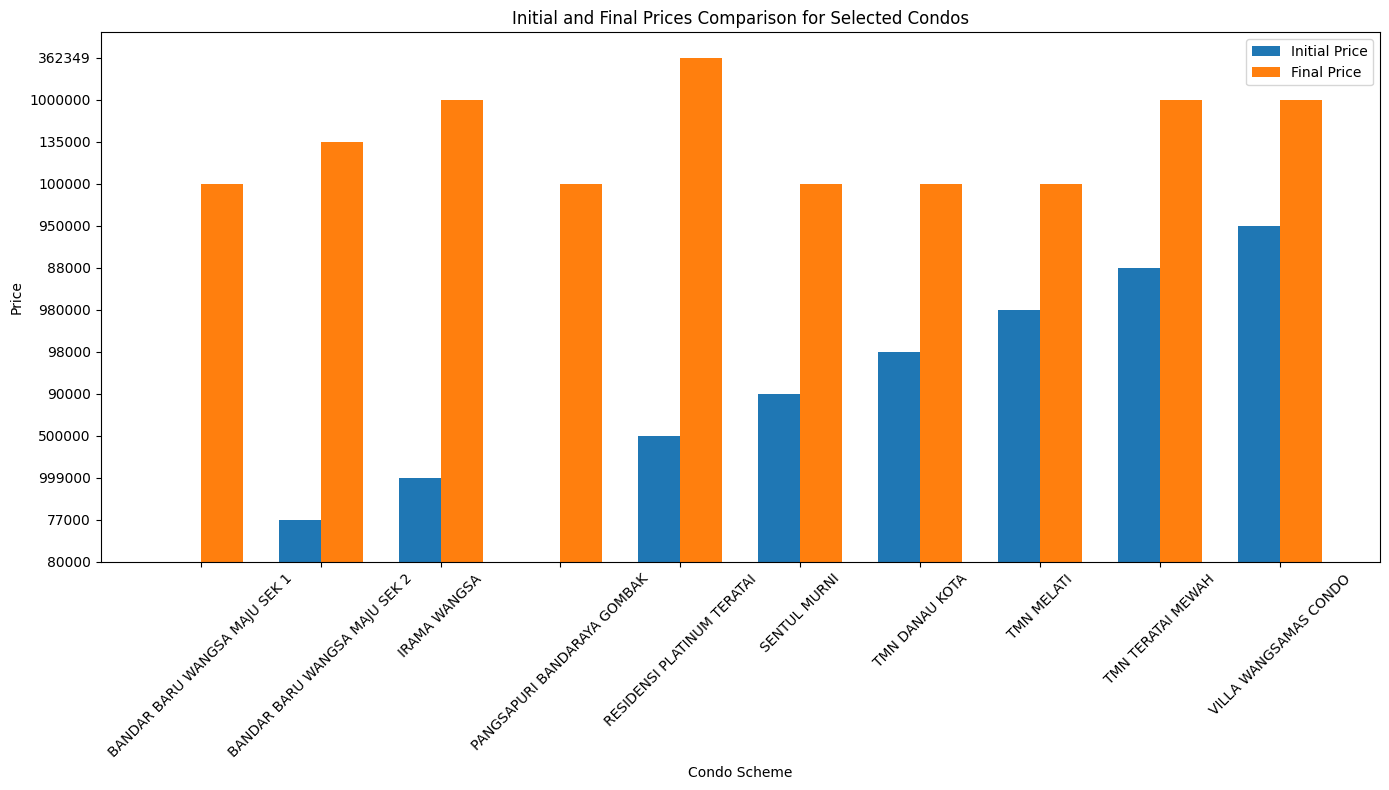

In [43]:
# Group the filtered data by scheme
scheme_groups = filtered_data.groupby('SCHEME')
initial_prices = scheme_groups['PRICE'].first()
final_prices = scheme_groups['PRICE'].last()
price_changes = pd.DataFrame({'Initial_Price': initial_prices, 'Final_Price': final_prices})
price_changes = price_changes.reset_index()

plt.figure(figsize=(14, 8))

# Set the positions and width for the bars
positions = np.arange(len(price_changes))
width = 0.35

# Plotting both the initial price and final price
plt.bar(positions - width/2, price_changes['Initial_Price'], width, label='Initial Price')
plt.bar(positions + width/2, price_changes['Final_Price'], width, label='Final Price')

# Adding some labels and title
plt.xlabel('Condo Scheme')
plt.ylabel('Price')
plt.title('Initial and Final Prices Comparison for Selected Condos')
plt.xticks(positions, price_changes['SCHEME'], rotation=45)

# Adding a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


####Appreciation Rate for Top 10 Scheme in Setapak

In [44]:
top_schemes = setapak_data['SCHEME'].value_counts().head(10).index.tolist()
top_schemes_data = setapak_data[setapak_data['SCHEME'].isin(top_schemes)]


In [45]:
top_schemes_data['PRICE'] = pd.to_numeric(top_schemes_data['PRICE'], errors='coerce')

# Group by scheme to calculate initial and final prices
scheme_groups = top_schemes_data.groupby('SCHEME')

initial_prices = scheme_groups['PRICE'].first()
final_prices = scheme_groups['PRICE'].last()

# Calculate appreciation rate
appreciation_rates = (final_prices - initial_prices) / initial_prices * 100

# Create a DataFrame for better visualization
appreciation_df = pd.DataFrame({
    'Initial_Price': initial_prices,
    'Final_Price': final_prices,
    'Appreciation_Rate (%)': appreciation_rates
}).reset_index()

# Display the appreciation rates for the top 10 schemes
display(appreciation_df)


<ipython-input-45-2d85d69dad72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_schemes_data['PRICE'] = pd.to_numeric(top_schemes_data['PRICE'], errors='coerce')


,SCHEME,Initial_Price,Final_Price,Appreciation_Rate (%)
0,BANDAR BARU WANGSA MAJU SEK 1,80000,100000,25.000000
1,BANDAR BARU WANGSA MAJU SEK 2,77000,135000,75.324675
2,IRAMA WANGSA,999000,1000000,0.100100
3,PANGSAPURI BANDARAYA GOMBAK,80000,100000,25.000000
4,RESIDENSI PLATINUM TERATAI,500000,362349,-27.530200
5,SENTUL MURNI,90000,100000,11.111111
6,TMN DANAU KOTA,98000,100000,2.040816
7,TMN MELATI,980000,100000,-89.795918
8,TMN TERATAI MEWAH,88000,1000000,1036.363636
9,VILLA WANGSAMAS CONDO,950000,1000000,5.263158


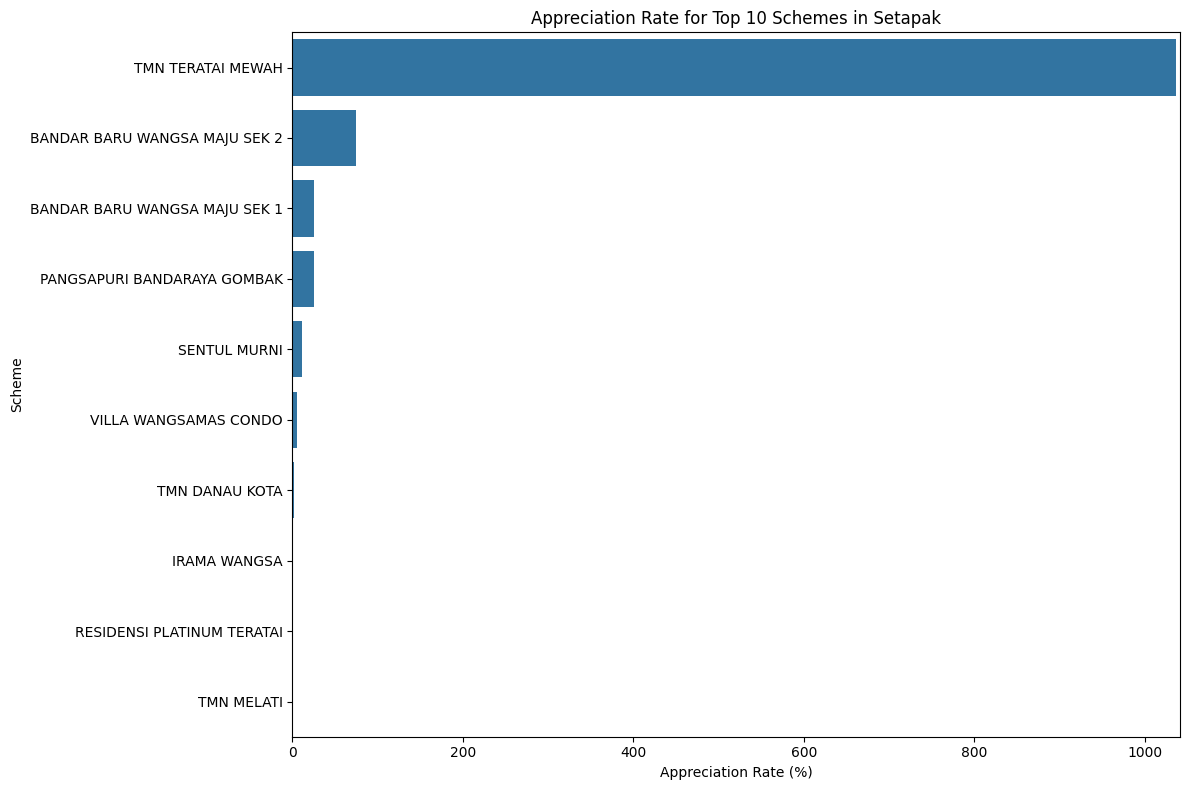

In [46]:

price_changes['Final_Price'] = pd.to_numeric(price_changes['Final_Price'], errors='coerce')
price_changes['Initial_Price'] = pd.to_numeric(price_changes['Initial_Price'], errors='coerce')

# Calculate the appreciation rate
price_changes['appreciation_rates'] = ((price_changes['Final_Price'] - price_changes['Initial_Price']) / price_changes['Initial_Price']) * 100

# Sort the schemes based on Appreciation Rate for better visualization
price_changes_sorted = price_changes.sort_values('appreciation_rates', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='appreciation_rates', y='SCHEME', data=price_changes_sorted)
plt.title('Appreciation Rate for Top 10 Schemes in Setapak')
plt.xlabel('Appreciation Rate (%)')
plt.ylabel('Scheme')
plt.xlim(0, price_changes_sorted['appreciation_rates'].max() + 5)  # Add some space to the right for clarity
plt.tight_layout()
plt.show()


###EDA

####Load the updated dataset

#### Handle missing values by dropping rows with any missing data

In [47]:
top_schemes_data.dropna(inplace=True)

<ipython-input-47-99ae4cb38869>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_schemes_data.dropna(inplace=True)


#### Remove duplicate rows


In [48]:
df_cleaned.head(10)

,SQUAREFOOT,TYPE,UNIT,SCHEME,PRICE,YEAR,distance_to_hospital,distance_to_LRT,Price_Category,price_per_sqft
0,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2020,9.81,3.61,expensive,6704.70
1,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2021,5.57,5.34,expensive,6704.70
2,139.000,Condominium/Apartment,32,IRAMA WANGSA,987000,2021,6.98,0.92,expensive,7100.72
3,344.009,Terraced House,2,TMN MELATI,980000,2020,3.52,5.00,expensive,2848.76
4,65.030,Low-Cost Flat,20,TMN DANAU KOTA,98000,2017,1.74,9.91,cheap,1507.00
5,139.000,Condominium/Apartment,32,IRAMA WANGSA,979000,2020,7.11,9.54,expensive,7043.17
6,139.000,Condominium/Apartment,32,IRAMA WANGSA,974000,2019,4.36,8.86,expensive,7007.19
7,139.000,Condominium/Apartment,32,IRAMA WANGSA,972000,2019,4.05,7.71,expensive,6992.81
8,139.000,Condominium/Apartment,32,IRAMA WANGSA,966000,2020,8.82,3.58,expensive,6949.64
9,139.000,Condominium/Apartment,32,IRAMA WANGSA,966000,2019,4.74,4.93,expensive,6949.64


In [49]:

df_cleaned.drop_duplicates(inplace=True)


#### Assuming outliers are defined as values beyond 3 standard deviations from the mean for each column

####Final shape of the dataset after preprocessing

In [50]:
df_cleaned.head(10)

,SQUAREFOOT,TYPE,UNIT,SCHEME,PRICE,YEAR,distance_to_hospital,distance_to_LRT,Price_Category,price_per_sqft
0,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2020,9.81,3.61,expensive,6704.70
1,149.000,Condominium/Apartment,32,IRAMA WANGSA,999000,2021,5.57,5.34,expensive,6704.70
2,139.000,Condominium/Apartment,32,IRAMA WANGSA,987000,2021,6.98,0.92,expensive,7100.72
3,344.009,Terraced House,2,TMN MELATI,980000,2020,3.52,5.00,expensive,2848.76
4,65.030,Low-Cost Flat,20,TMN DANAU KOTA,98000,2017,1.74,9.91,cheap,1507.00
5,139.000,Condominium/Apartment,32,IRAMA WANGSA,979000,2020,7.11,9.54,expensive,7043.17
6,139.000,Condominium/Apartment,32,IRAMA WANGSA,974000,2019,4.36,8.86,expensive,7007.19
7,139.000,Condominium/Apartment,32,IRAMA WANGSA,972000,2019,4.05,7.71,expensive,6992.81
8,139.000,Condominium/Apartment,32,IRAMA WANGSA,966000,2020,8.82,3.58,expensive,6949.64
9,139.000,Condominium/Apartment,32,IRAMA WANGSA,966000,2019,4.74,4.93,expensive,6949.64


####Correlation heatmap


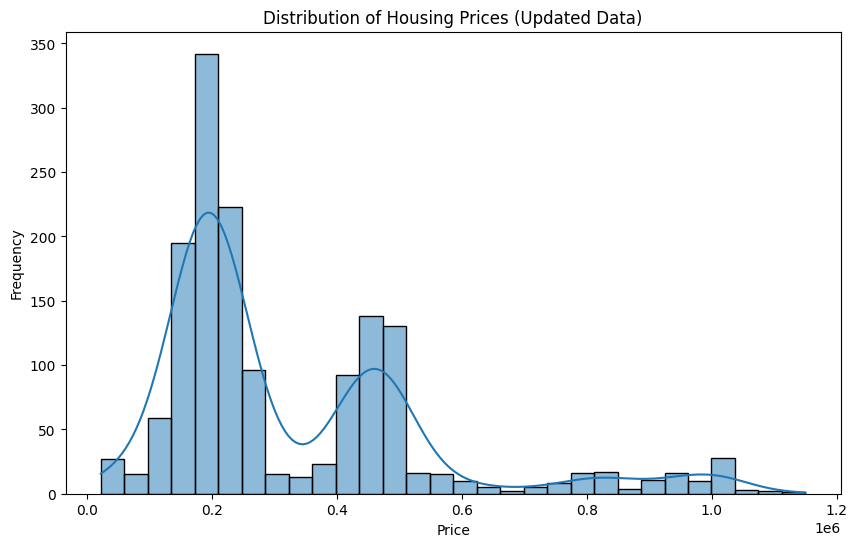

<ipython-input-51-efa4d7d81ed0>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")


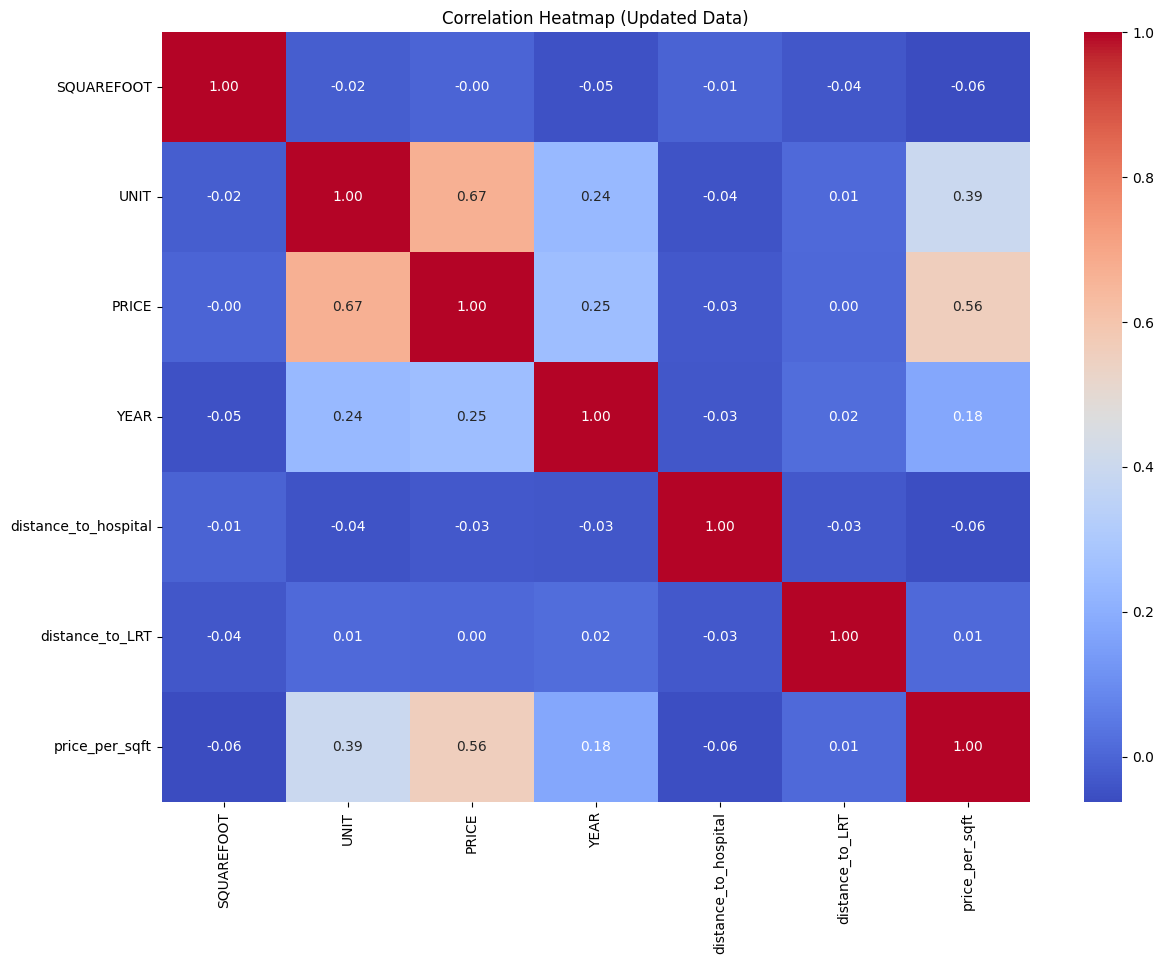

In [51]:
# Distribution of the PRICE variable in the updated dataset
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['PRICE'], kde=True, bins=30)
plt.title('Distribution of Housing Prices (Updated Data)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for the updated dataset
plt.figure(figsize=(14, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Updated Data)')
plt.show()


###PCA

####Apply PCA to reduce dimensionality while retaining 95% of the variance

#### Normalize the numerical values using MinMaxScaler

In [52]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['SQUAREFOOT', 'UNIT', 'distance_to_LRT', 'distance_to_hospital', 'YEAR']
scaler = MinMaxScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


In [53]:
for col in numerical_cols:
    mean = df_cleaned[col].mean()
    std = df_cleaned[col].std()
    df_cleaned = df_cleaned[(df_cleaned[col] >= (mean - 3*std)) &
                                                (df_cleaned[col] <= (mean + 3*std))]

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



#### Identify categorical columns in the dataset

In [55]:
df_cleaned.head(5)

,SQUAREFOOT,TYPE,UNIT,SCHEME,PRICE,YEAR,distance_to_hospital,distance_to_LRT,Price_Category,price_per_sqft
0,0.004867,Condominium/Apartment,1.0000,IRAMA WANGSA,999000,0.75,0.980750,0.354904,expensive,6704.70
1,0.004867,Condominium/Apartment,1.0000,IRAMA WANGSA,999000,1.00,0.551165,0.529828,expensive,6704.70
2,0.004541,Condominium/Apartment,1.0000,IRAMA WANGSA,987000,1.00,0.694022,0.082912,expensive,7100.72
3,0.011238,Terraced House,0.0625,TMN MELATI,980000,0.75,0.343465,0.495450,expensive,2848.76
4,0.002124,Low-Cost Flat,0.6250,TMN DANAU KOTA,98000,0.00,0.163121,0.991911,cheap,1507.00


#**RAAN**

In [56]:
# Drop the 'PRICE' and 'Price_Category' columns from the DataFrame
X = df_cleaned.drop(['PRICE', 'Price_Category'], axis=1)
y = df_cleaned['Price_Category']
# Now, X contains only the features without the target variable 'PRICE'


In [57]:
X.head(5)

,SQUAREFOOT,TYPE,UNIT,SCHEME,YEAR,distance_to_hospital,distance_to_LRT,price_per_sqft
0,0.004867,Condominium/Apartment,1.0000,IRAMA WANGSA,0.75,0.980750,0.354904,6704.70
1,0.004867,Condominium/Apartment,1.0000,IRAMA WANGSA,1.00,0.551165,0.529828,6704.70
2,0.004541,Condominium/Apartment,1.0000,IRAMA WANGSA,1.00,0.694022,0.082912,7100.72
3,0.011238,Terraced House,0.0625,TMN MELATI,0.75,0.343465,0.495450,2848.76
4,0.002124,Low-Cost Flat,0.6250,TMN DANAU KOTA,0.00,0.163121,0.991911,1507.00


In [58]:
y.head()

0    expensive
1    expensive
2    expensive
3    expensive
4    cheap    
Name: Price_Category, dtype: category
Categories (3, object): ['cheap' < 'normal' < 'expensive']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
print(X.dtypes)


SQUAREFOOT              float64
TYPE                    object 
UNIT                    float64
SCHEME                  object 
YEAR                    float64
distance_to_hospital    float64
distance_to_LRT         float64
price_per_sqft          float64
dtype: object


In [61]:
from sklearn import preprocessing

categorical = ['TYPE', 'SCHEME']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [62]:
# Check for missing values in X_train and X_test
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())
print("Infinite values in X_train:", np.any(~np.isfinite(X_train)))
print("Infinite values in X_test:", np.any(~np.isfinite(X_test)))
print("Data types of X_train:\n", X_train.dtypes)
print("Data types of X_test:\n", X_test.dtypes)



Missing values in X_train: 0
Missing values in X_test: 0
Infinite values in X_train: True
Infinite values in X_test: True
Data types of X_train:
 SQUAREFOOT              float64
TYPE                    int64  
UNIT                    float64
SCHEME                  int64  
YEAR                    float64
distance_to_hospital    float64
distance_to_LRT         float64
price_per_sqft          float64
dtype: object
Data types of X_test:
 SQUAREFOOT              float64
TYPE                    int64  
UNIT                    float64
SCHEME                  int64  
YEAR                    float64
distance_to_hospital    float64
distance_to_LRT         float64
price_per_sqft          float64
dtype: object


In [63]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [64]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [65]:
X_train.head()

,SQUAREFOOT,TYPE,UNIT,SCHEME,YEAR,distance_to_hospital,distance_to_LRT,price_per_sqft
196,0.002809,0,0.93750,4,0.5,0.074975,0.133468,5813.95
846,0.001601,1,0.15625,1,0.0,0.372847,0.643074,4489.80
1348,0.002123,2,0.62500,6,0.5,0.741641,0.803842,2461.54
81,0.004998,3,0.06250,7,0.5,0.588652,0.170880,5032.68
1440,0.001699,2,0.15625,7,0.0,0.960486,0.573306,2613.46



####Initialize and train the models

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [67]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression accuracy score with scaled features: {0:0.4f}'.format(accuracy))


Logistic Regression accuracy score with scaled features: 0.9251


In [68]:
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)
imbalance_ratio = class_distribution.max() / class_distribution.min()
print("Imbalance Ratio:", imbalance_ratio)


Class Distribution:
cheap        859
normal       538
expensive    138
Name: Price_Category, dtype: int64
Imbalance Ratio: 6.22463768115942


In [69]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [70]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8534201954397395


In [71]:
pca = PCA(n_components=0.95)
logreg_pca = LogisticRegression(max_iter=1000)

pipeline_pca = Pipeline([
    ('pca', pca),
    ('logreg', logreg_pca)
])

# PCA
pipeline_pca.fit(X_resampled, y_resampled)
y_pred_pca = pipeline_pca.predict(X_test)

#Evaluate model with PCA
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred_pca))

# without PCA
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test)

# Evaluate the model without PCA
print("\nClassification Report without PCA:")
print(classification_report(y_test, y_pred))


Classification Report with PCA:
              precision    recall  f1-score   support

       cheap       0.82      0.75      0.78       171
   expensive       0.45      0.70      0.55        27
      normal       0.56      0.55      0.55       109

    accuracy                           0.67       307
   macro avg       0.61      0.67      0.63       307
weighted avg       0.69      0.67      0.68       307


Classification Report without PCA:
              precision    recall  f1-score   support

       cheap       0.92      0.91      0.91       171
   expensive       0.62      0.85      0.72        27
      normal       0.83      0.76      0.79       109

    accuracy                           0.85       307
   macro avg       0.79      0.84      0.81       307
weighted avg       0.86      0.85      0.85       307



In [72]:
#Training accuracy for logistic regression with PCA
accuracy_train_pca = accuracy_score(y_resampled, pipeline_pca.predict(X_resampled))

#Testing accuracy for logistic regression with PCA
accuracy_test_pca = accuracy_score(y_test, y_pred_pca)

#Training accuracy for logistic regression without PCA
accuracy_train_lr = accuracy_score(y_resampled, logreg.predict(X_resampled))

#Testing accuracy for logistic regression without PCA
accuracy_test_lr = accuracy_score(y_test, y_pred)

print("Training Accuracy (Logistic Regression with PCA):", accuracy_train_pca)
print("Testing Accuracy (Logistic Regression with PCA):", accuracy_test_pca)
print("Training Accuracy (Logistic Regression without PCA):", accuracy_train_lr)
print("Testing Accuracy (Logistic Regression without PCA):", accuracy_test_lr)


Training Accuracy (Logistic Regression with PCA): 0.7185077519379846
Testing Accuracy (Logistic Regression with PCA): 0.6742671009771987
Training Accuracy (Logistic Regression without PCA): 0.8343023255813954
Testing Accuracy (Logistic Regression without PCA): 0.8534201954397395


In [73]:
y_resampled.head()

0    normal   
1    cheap    
2    cheap    
3    expensive
4    cheap    
Name: Price_Category, dtype: category
Categories (3, object): ['cheap' < 'normal' < 'expensive']

In [74]:
label_map = {'cheap': 1, 'normal': 2, 'expensive': 3}
y_resampled_encoded = y_resampled.map(label_map)


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

label_map = {'cheap': 1, 'normal': 2, 'expensive': 3}
y_resampled_encoded = y_resampled.map(label_map)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_resampled, y_resampled_encoded)
y_pred_rf = rf_classifier.predict(X_test)

# Convert test labels to numerical values
y_test_encoded = y_test.map(label_map)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)
report_rf = classification_report(y_test_encoded, y_pred_rf)
print("Classification Report (Random Forest):\n", report_rf)

# Predictions on the training set
y_train_pred_rf = rf_classifier.predict(X_resampled)
accuracy_train_rf = accuracy_score(y_resampled_encoded, y_train_pred_rf)

# Predictions on the test set
y_test_pred_rf = rf_classifier.predict(X_test)
accuracy_test_rf = accuracy_score(y_test_encoded, y_test_pred_rf)

print("Training Accuracy (Random Forest):", accuracy_train_rf)
print("Testing Accuracy (Random Forest):", accuracy_test_rf)

Accuracy (Random Forest): 0.9739413680781759
Classification Report (Random Forest):
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       171
           2       0.99      0.94      0.96       109
           3       0.93      1.00      0.96        27

    accuracy                           0.97       307
   macro avg       0.96      0.98      0.97       307
weighted avg       0.97      0.97      0.97       307

Training Accuracy (Random Forest): 1.0
Testing Accuracy (Random Forest): 0.9739413680781759


In [76]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_resampled, y_resampled_encoded)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test_encoded, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)


# Generate classification report
report_gb = classification_report(y_test_encoded, y_pred_gb)
print("Classification Report (Gradient Boosting):\n", report_gb)

# Predictions on the training set
y_train_pred_gb = gb_classifier.predict(X_resampled)
accuracy_train_gb = accuracy_score(y_resampled_encoded, y_train_pred_gb)

# Predictions on the test set
y_test_pred_gb = gb_classifier.predict(X_test)
accuracy_test_gb = accuracy_score(y_test_encoded, y_test_pred_gb)

print("Training Accuracy (Gradient Boosting):", accuracy_train_gb)
print("Testing Accuracy (Gradient Boosting):", accuracy_test_gb)

Accuracy (Gradient Boosting): 0.9837133550488599
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           1       0.98      0.99      0.99       171
           2       0.99      0.96      0.98       109
           3       0.96      1.00      0.98        27

    accuracy                           0.98       307
   macro avg       0.98      0.99      0.98       307
weighted avg       0.98      0.98      0.98       307

Training Accuracy (Gradient Boosting): 1.0
Testing Accuracy (Gradient Boosting): 0.9837133550488599


In [77]:
data = {
    'Model': ['Logistic Regression with PCA', 'Logistic Regression without PCA', 'Random Forest', 'Gradient Boosting'],
    'Training Accuracy': [accuracy_train_pca, accuracy_train_lr, accuracy_train_rf, accuracy_train_gb],
    'Testing Accuracy': [accuracy_test_pca, accuracy_test_lr, accuracy_test_rf, accuracy_test_gb]
}
accuracy_df = pd.DataFrame(data)
print(accuracy_df)

                             Model  Training Accuracy  Testing Accuracy
0  Logistic Regression with PCA     0.718508           0.674267        
1  Logistic Regression without PCA  0.834302           0.853420        
2  Random Forest                    1.000000           0.973941        
3  Gradient Boosting                1.000000           0.983713        
